# Machine Learning Models Application on Womens Clothing ECommerce Reviews 'Predication'
# NLTK Text Processing Application on Womens Clothing ECommerce Reviews
# VADER  Application on Womens Clothing ECommerce Reviews 'Sentimental Analysis'

## General Feature Extraction 'Data Understanging'
* Import the Dataset
* Target Value Count
* Word counts
* Characters count
* Average characters per word
* Stop words count
* Count punctuations
* Count numeric digits
* URLs
* Emails

## Preprocessing and Cleaning
* Lower case
* Contraction to Expansion
* Emails removal
* URLs removal
* Remove punctuations
* Remove HTML Tags
* Convert Accent Chars
* Remove Stop Words
* Remove Extra Spaces
* Stemming NLTK 
* Lemmatizing NLTK

## Word Cloud and EDA

* EDA Target
* EDA IDV
* EDA IDV - DV
* WordCloud
* Tokenizing

## VADER 'Sentimental Analysis'

## Data Splitting & (Voctrization - TFIDF)
* Data Splitting X,y
* Voctrization
* TFIDF

## Machine Learning Models 
- Build the Models 'Train the Models'
-        Random Forest Classifier
-        Gradient Boosting Classifier
-        Histogram-based Gradient Boosting Classification Tree
-        AdaBoost Classifier
-        Extra Trees Classifier
-        K Neighbors Classifier
-        Naive Bayes Classifiers
-        Naive Bayes Classifier for Multivariate Bernoulli
-        Decision Tree Classifier
-        Logistic Regression Classifier
-        Logistic Regression CV Classifier
-        Stochastic Gradient Descent Classifier
-        Linear Perceptron Classifier
-        XGBoost Classifiers
-        Support Vector Machines Classifiers
-        Linear Support Vector Classification
-        Multilayer Perceptron Classifier
- Predication X_test
- Models Evaluation
-       Accuracy Score
-       Classification Report
-       Confusion Matrix

# Import Python Libraries

In [1]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt
import plotly.express as px
from termcolor import colored 
import seaborn as sns  
from tabulate import tabulate

# Importing plotly and cufflinks in offline mode
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

# Figure&Display options
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('max_colwidth',200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 200)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

from tabulate import tabulate
from nltk.corpus import stopwords

import re
import contractions
import unicodedata
from nltk.stem import WordNetLemmatizer

import nltk
lemmatizer = WordNetLemmatizer()

from wordcloud import WordCloud 

from nltk.stem import PorterStemmer
ps = PorterStemmer()

from nltk.corpus import wordnet

from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf_vectorizer = TfidfVectorizer()

from textblob import TextBlob

from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
sia = SentimentIntensityAnalyzer()

# Function Helper

In [2]:
'''
      Missong Value Information
'''
def missing_values(df_missing_value_per):
      missing_number = df_missing_value_per.isnull().sum().sort_values(ascending=False)
      missing_percent = (df_missing_value_per.isnull().sum()/df_missing_value_per.shape[0]).sort_values(ascending=False) 
      missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])

      return missing_values[missing_values['Missing_Number']>=0]

def missing_values_info(df_missing_value):
      print(colored(f"Missing Values for Catuogirical Dataset:\n", attrs=['bold']), missing_values(df_missing_value),'\n',  
            colored('-'*79, 'red', attrs=['bold']), sep='')

def SelectRowsHavingMissing_Value(df_Missing_Rows):
      null_data = df_Missing_Rows[df_Missing_Rows.isnull().any(axis=1)]
      
      return null_data
      
def replace_NA_by_0(df_replace, Col_NA_TO_Zero):
      if Col_NA_TO_Zero !=[]:
            df_replace[Col_NA_TO_Zero] = df_replace[Col_NA_TO_Zero].fillna(0)
            
      return df_replace

def replace_0_by_NA(df_replace, col_0_to_NA):
      df_replace[col_0_to_NA] = df_replace[col_0_to_NA].replace(0, np.nan, inplace=True)

      return df_replace

'''
      Convert Data Type
'''
def Convert_Data_Typt_to_str(Con_df_str, colu):
      Con_df_str[colu] = Con_df_str[colu].apply(str)
      print ('\nData Type Changed to Objective for Variable: [', colu , '] Data type now is: ' , Con_df_str[colu].dtype)

      return Con_df_str

'''
      EDA
'''
def obj_EDA(df_EDA, cols):
      for col in cols:
            table = pd.DataFrame(df_EDA[col].value_counts())
            print(tabulate(table, headers = 'keys', tablefmt = 'psql'))
            plt.figure(figsize = (20,20))
            df_EDA[col].value_counts(normalize = True).plot(kind='bar', color= ['darkorange','steelblue'], alpha = 0.9, rot=0)
            plt.title(col)
            plt.show()

def EDA_obj(df_EDA, cols, Target):
      for col in cols:
            print('Variable Name: ', df_EDA[col].name)
            pd.crosstab(df_EDA[col], df_EDA[Target]).iplot(kind="bar")

def EDA_num_with_DV(df_eda, NUMcols_eda, target): 
    for col in NUMcols_eda:
        sns.set_style('whitegrid')
        plt.figure(figsize=(20,10))
        sns.set_context('paper', font_scale=1.5)

        sns.histplot(x=col, data = df_eda, bins = 30, hue =target,palette="Blues", kde = True).set_title(col,fontsize=20)

# Import Dataset

In [3]:
df = pd.read_csv('C:/Users/rbani/OneDrive/Desktop/My Final AI/GitHub Codes/Sentimant Analysis/NLP Sentiment Classification/Womens Clothing E-Commerce Reviews/Womens Clothing E-Commerce Reviews.csv')

In [4]:
pd.DataFrame(df)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comfortable,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length...",5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i co...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a great price! it's very easy to slip on and has a very flattering cut and color combo.,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stretchy, shiny material. cut is flattering and drapes nicely. i only found one button to close front... looked awkward. nice long sleeves.\nnot for me bu...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see through. this never would have worked for me. i'm glad i was able to try it on in the store and didn't order it online. with different fabric, it would have...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties and we","I bought this dress for a wedding i have this summer, and it's so cute. unfortunately the fit isn't perfect. the medium fits my waist perfectly, but was way too long and too big in the bust and sh...",3,1,2,General,Dresses,Dresses


# Data Prepration 

## Drop Varibales 

In [5]:
df = df.drop(['Unnamed: 0', 'Clothing ID'], axis = 1)

In [6]:
pd.DataFrame(df)

,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,33,NaN,Absolutely wonderful - silky and sexy and comfortable,4,1,0,Initmates,Intimate,Intimates
1,34,NaN,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length...",5,1,4,General,Dresses,Dresses
2,60,Some major design flaws,I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i co...,3,0,0,General,Dresses,Dresses
3,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",5,1,0,General Petite,Bottoms,Pants
4,47,Flattering shirt,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...
23481,34,Great dress for many occasions,I was very happy to snag this dress at such a great price! it's very easy to slip on and has a very flattering cut and color combo.,5,1,0,General Petite,Dresses,Dresses
23482,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stretchy, shiny material. cut is flattering and drapes nicely. i only found one button to close front... looked awkward. nice long sleeves.\nnot for me bu...",3,1,0,General Petite,Tops,Knits
23483,31,"Cute, but see through","This fit well, but the top was very see through. this never would have worked for me. i'm glad i was able to try it on in the store and didn't order it online. with different fabric, it would have...",3,0,1,General Petite,Dresses,Dresses
23484,28,"Very cute dress, perfect for summer parties and we","I bought this dress for a wedding i have this summer, and it's so cute. unfortunately the fit isn't perfect. the medium fits my waist perfectly, but was way too long and too big in the bust and sh...",3,1,2,General,Dresses,Dresses


## Rename Varibales 

In [7]:
df = df.rename(columns = {'Review Text' : 'text', 'Recommended IND' : 'recommended', 
                          'Positive Feedback Coun' : 'feedback_count', 'Division Name' : 'division', 
                          'Department Name' : 'department', 'Class Name' :'class'})

## Convert Data Type

In [8]:
df = Convert_Data_Typt_to_str(df, 'recommended')


Data Type Changed to Objective for Variable: [ recommended ] Data type now is:  object


# Data Understanging 

## Information Summary

In [9]:
print(df.info(), '\n', 
            colored('-'*79, 'red', attrs=['bold']), sep='')
missing_values_info(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      23486 non-null  int64 
 1   Title                    19676 non-null  object
 2   text                     22641 non-null  object
 3   Rating                   23486 non-null  int64 
 4   recommended              23486 non-null  object
 5   Positive Feedback Count  23486 non-null  int64 
 6   division                 23472 non-null  object
 7   department               23472 non-null  object
 8   class                    23472 non-null  object
dtypes: int64(3), object(6)
memory usage: 1.6+ MB
None
-------------------------------------------------------------------------------
Missing Values for Catuogirical Dataset:
                         Missing_Number  Missing_Percent
Title                              3810            0.162
text               

## Drop Missing Value

In [10]:
df = df.dropna()
df = df.reset_index()
df = df.drop(columns=['index'])

## Summury STAT

In [11]:
su_stat = pd.DataFrame(df.describe().T)
print(tabulate(su_stat, headers = 'keys', tablefmt = 'psql'))

+-------------------------+---------+----------+----------+-------+-------+-------+-------+-------+
|                         |   count |     mean |      std |   min |   25% |   50% |   75% |   max |
|-------------------------+---------+----------+----------+-------+-------+-------+-------+-------|
| Age                     |   19662 | 43.2608  | 12.2581  |    18 |    34 |    41 |    52 |    99 |
| Rating                  |   19662 |  4.18315 |  1.11222 |     1 |     4 |     5 |     5 |     5 |
| Positive Feedback Count |   19662 |  2.65248 |  5.83428 |     0 |     0 |     1 |     3 |   122 |
+-------------------------+---------+----------+----------+-------+-------+-------+-------+-------+


In [12]:
su_stat = pd.DataFrame(df.describe(include=object).T)
print(tabulate(su_stat, headers = 'keys', tablefmt = 'psql'))

+-------------+---------+----------+------------------------------------------------------------------------------------+--------+
|             |   count |   unique | top                                                                                |   freq |
|-------------+---------+----------+------------------------------------------------------------------------------------+--------|
| Title       |   19662 |    13983 | Love it!                                                                           |    136 |
| text        |   19662 |    19656 | Perfect fit and i've gotten so many compliments. i buy all my suits from here now! |      3 |
| recommended |   19662 |        2 | 1                                                                                  |  16087 |
| division    |   19662 |        3 | General                                                                            |  11664 |
| department  |   19662 |        6 | Tops                                          

## Target Value Count

In [13]:
print(df['recommended'].value_counts())

1    16087
0     3575
Name: recommended, dtype: int64


## word counts

In [14]:
df['word_count'] = df['text'].apply(lambda x : len(str(x).split())) # we can change .split() to word
pd.DataFrame(df.head())

,Age,Title,text,Rating,recommended,Positive Feedback Count,division,department,class,word_count
0,60,Some major design flaws,I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i co...,3,0,0,General,Dresses,Dresses,98
1,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",5,1,0,General Petite,Bottoms,Pants,22
2,47,Flattering shirt,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,5,1,6,General,Tops,Blouses,36
3,49,Not for the very petite,"I love tracy reese dresses, but this one is not for the very petite. i am just under 5 feet tall and usually wear a 0p in this brand. this dress was very pretty out of the package but its a lot of...",2,0,4,General,Dresses,Dresses,98
4,39,Cagrcoal shimmer fun,"I aded this in my basket at hte last mintue to see what it would look like in person. (store pick up). i went with teh darkler color only because i am so pale :-) hte color is really gorgeous, and...",5,1,1,General Petite,Tops,Knits,101


## Char Count 

In [15]:
df['char_count'] = df['text'].apply(lambda x : len(x))
pd.DataFrame(df.head())

,Age,Title,text,Rating,recommended,Positive Feedback Count,division,department,class,word_count,char_count
0,60,Some major design flaws,I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i co...,3,0,0,General,Dresses,Dresses,98,500
1,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",5,1,0,General Petite,Bottoms,Pants,22,124
2,47,Flattering shirt,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,5,1,6,General,Tops,Blouses,36,192
3,49,Not for the very petite,"I love tracy reese dresses, but this one is not for the very petite. i am just under 5 feet tall and usually wear a 0p in this brand. this dress was very pretty out of the package but its a lot of...",2,0,4,General,Dresses,Dresses,98,488
4,39,Cagrcoal shimmer fun,"I aded this in my basket at hte last mintue to see what it would look like in person. (store pick up). i went with teh darkler color only because i am so pale :-) hte color is really gorgeous, and...",5,1,1,General Petite,Tops,Knits,101,496


## Avg word length

In [16]:
df['avg_word_len'] = df['char_count']/df['word_count']
pd.DataFrame(df.head())

,Age,Title,text,Rating,recommended,Positive Feedback Count,division,department,class,word_count,char_count,avg_word_len
0,60,Some major design flaws,I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i co...,3,0,0,General,Dresses,Dresses,98,500,5.102
1,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",5,1,0,General Petite,Bottoms,Pants,22,124,5.636
2,47,Flattering shirt,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,5,1,6,General,Tops,Blouses,36,192,5.333
3,49,Not for the very petite,"I love tracy reese dresses, but this one is not for the very petite. i am just under 5 feet tall and usually wear a 0p in this brand. this dress was very pretty out of the package but its a lot of...",2,0,4,General,Dresses,Dresses,98,488,4.980
4,39,Cagrcoal shimmer fun,"I aded this in my basket at hte last mintue to see what it would look like in person. (store pick up). i went with teh darkler color only because i am so pale :-) hte color is really gorgeous, and...",5,1,1,General Petite,Tops,Knits,101,496,4.911


## NLTK Stop Words 

In [17]:
stop_words = set(stopwords.words("english"))

In [18]:
print("NLTK Stopwordes are: \n", stop_words)

NLTK Stopwordes are: 
 {'now', 'below', 'its', 'such', 'yourself', "you're", 'they', 'did', "haven't", 'the', "couldn't", "didn't", 'wouldn', 'here', 'most', 'these', 'a', "weren't", 'because', 'me', 'shouldn', 'those', 'them', 'no', 'll', 'some', 'with', 'any', 'o', "doesn't", "wasn't", "needn't", 'as', 'that', 'off', 'does', 'yours', 'just', 'needn', 'has', 'being', 'didn', 'on', 'herself', "isn't", 'their', 'then', "hadn't", 'd', 'once', 'or', 'weren', 'when', 'ourselves', 'her', 'an', 'isn', 'where', "shan't", 'other', 'shan', 'our', 'own', 'myself', 'themselves', 'what', 'in', 'can', 'hasn', 'were', "you'll", 'at', 'so', 'ain', 'under', 'and', 'whom', 'y', 'have', 'above', 'against', 'wasn', 'his', 'which', "shouldn't", 'nor', 'down', 'how', 'won', 'doing', 'don', "mightn't", 'if', 'is', 'mustn', 'your', 'my', 'than', 'ours', 'you', 'be', 'he', 'during', 'further', 'was', 'had', 'having', "you'd", 'm', 'same', "wouldn't", 'who', 'been', "hasn't", 's', 'out', "don't", 'haven', 'whi

In [19]:
print(len(stop_words))

179


In [20]:
df['stopWords_words'] = df['text'].apply(lambda x : [ t for t in x.split() if t in stop_words])
pd.DataFrame(df.head())

,Age,Title,text,Rating,recommended,Positive Feedback Count,division,department,class,word_count,char_count,avg_word_len,stopWords_words
0,60,Some major design flaws,I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i co...,3,0,0,General,Dresses,Dresses,98,500,5.102,"[had, such, for, this, and, it, to, for, i, the, but, i, this, to, be, so, in, that, i, not, it, i, it, in, which, was, just, the, was, and, but, the, had, a, very, under, and, over, a, was, the, ..."
1,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",5,1,0,General Petite,Bottoms,Pants,22,124,5.636,"[this, it's, and, i, i, but]"
2,47,Flattering shirt,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,5,1,6,General,Tops,Blouses,36,192,5.333,"[is, very, to, all, to, the, it, is, the, to, with, and, it, is, so, it, with, any, this]"
3,49,Not for the very petite,"I love tracy reese dresses, but this one is not for the very petite. i am just under 5 feet tall and usually wear a 0p in this brand. this dress was very pretty out of the package but its a lot of...",2,0,4,General,Dresses,Dresses,98,488,4.980,"[but, this, is, not, for, the, very, i, am, just, under, and, a, in, this, this, was, very, out, of, the, but, its, a, of, the, is, and, very, so, it, my, not, a, to, and, the, from, the, of, the,..."
4,39,Cagrcoal shimmer fun,"I aded this in my basket at hte last mintue to see what it would look like in person. (store pick up). i went with teh darkler color only because i am so pale :-) hte color is really gorgeous, and...",5,1,1,General Petite,Tops,Knits,101,496,4.911,"[this, in, my, at, to, what, it, in, i, with, only, because, i, am, so, is, and, out, it, i, was, on, with, it, it, is, a, on, me, and, is, no, i, to, it, because, as, i, it, my, and, the, i, on, ..."


In [21]:
df['len_of_stopWords'] = df['text'].apply(lambda x : len([t for t in x.split() if t in stop_words]))
pd.DataFrame(df.head())

,Age,Title,text,Rating,recommended,Positive Feedback Count,division,department,class,word_count,char_count,avg_word_len,stopWords_words,len_of_stopWords
0,60,Some major design flaws,I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i co...,3,0,0,General,Dresses,Dresses,98,500,5.102,"[had, such, for, this, and, it, to, for, i, the, but, i, this, to, be, so, in, that, i, not, it, i, it, in, which, was, just, the, was, and, but, the, had, a, very, under, and, over, a, was, the, ...",45
1,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",5,1,0,General Petite,Bottoms,Pants,22,124,5.636,"[this, it's, and, i, i, but]",6
2,47,Flattering shirt,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,5,1,6,General,Tops,Blouses,36,192,5.333,"[is, very, to, all, to, the, it, is, the, to, with, and, it, is, so, it, with, any, this]",19
3,49,Not for the very petite,"I love tracy reese dresses, but this one is not for the very petite. i am just under 5 feet tall and usually wear a 0p in this brand. this dress was very pretty out of the package but its a lot of...",2,0,4,General,Dresses,Dresses,98,488,4.980,"[but, this, is, not, for, the, very, i, am, just, under, and, a, in, this, this, was, very, out, of, the, but, its, a, of, the, is, and, very, so, it, my, not, a, to, and, the, from, the, of, the,...",55
4,39,Cagrcoal shimmer fun,"I aded this in my basket at hte last mintue to see what it would look like in person. (store pick up). i went with teh darkler color only because i am so pale :-) hte color is really gorgeous, and...",5,1,1,General Petite,Tops,Knits,101,496,4.911,"[this, in, my, at, to, what, it, in, i, with, only, because, i, am, so, is, and, out, it, i, was, on, with, it, it, is, a, on, me, and, is, no, i, to, it, because, as, i, it, my, and, the, i, on, ...",47


## punctuations

In [22]:
def check_find_punctuations(text):
    result = re.findall(r'[!"\$%&\'()*+,\-.\/:;=#@?\[\\\]^_`{|}~]*', 
                        text)
    string = "".join(result)
    
    return list(string)

In [23]:
df['punctuation_used'] = df['text'].apply(
                         lambda x : check_find_punctuations(x)
                         )

In [24]:
pd.DataFrame(df.head())

,Age,Title,text,Rating,recommended,Positive Feedback Count,division,department,class,word_count,char_count,avg_word_len,stopWords_words,len_of_stopWords,punctuation_used
0,60,Some major design flaws,I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i co...,3,0,0,General,Dresses,Dresses,98,500,5.102,"[had, such, for, this, and, it, to, for, i, the, but, i, this, to, be, so, in, that, i, not, it, i, it, in, which, was, just, the, was, and, but, the, had, a, very, under, and, over, a, was, the, ...",45,"[., (, ), ., !, ,, ., ,, ,, (, ), ., ,, -]"
1,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",5,1,0,General Petite,Bottoms,Pants,22,124,5.636,"[this, it's, and, i, i, but]",6,"[,, ,, ., ', ,, ,, !, ,, !]"
2,47,Flattering shirt,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,5,1,6,General,Tops,Blouses,36,192,5.333,"[is, very, to, all, to, the, it, is, the, to, with, and, it, is, so, it, with, any, this]",19,"[., ., !, !, !]"
3,49,Not for the very petite,"I love tracy reese dresses, but this one is not for the very petite. i am just under 5 feet tall and usually wear a 0p in this brand. this dress was very pretty out of the package but its a lot of...",2,0,4,General,Dresses,Dresses,98,488,4.980,"[but, this, is, not, for, the, very, i, am, just, under, and, a, in, this, this, was, very, out, of, the, but, its, a, of, the, is, and, very, so, it, my, not, a, to, and, the, from, the, of, the,...",55,"[,, ., ., ., ., ,, ., ., .]"
4,39,Cagrcoal shimmer fun,"I aded this in my basket at hte last mintue to see what it would look like in person. (store pick up). i went with teh darkler color only because i am so pale :-) hte color is really gorgeous, and...",5,1,1,General Petite,Tops,Knits,101,496,4.911,"[this, in, my, at, to, what, it, in, i, with, only, because, i, am, so, is, and, out, it, i, was, on, with, it, it, is, a, on, me, and, is, no, i, to, it, because, as, i, it, my, and, the, i, on, ...",47,"[., (, ), ., :, -, ), ,, ., (, ,, ), ., ,, ,, ., ,, ,, (, ], ), .]"


## Numerical Digits

In [25]:
df['numeric'] = df['text'].apply(lambda x : len([t for t in x.split() if t.isdigit()]))
pd.DataFrame(df.head())

,Age,Title,text,Rating,recommended,Positive Feedback Count,division,department,class,word_count,char_count,avg_word_len,stopWords_words,len_of_stopWords,punctuation_used,numeric
0,60,Some major design flaws,I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i co...,3,0,0,General,Dresses,Dresses,98,500,5.102,"[had, such, for, this, and, it, to, for, i, the, but, i, this, to, be, so, in, that, i, not, it, i, it, in, which, was, just, the, was, and, but, the, had, a, very, under, and, over, a, was, the, ...",45,"[., (, ), ., !, ,, ., ,, ,, (, ), ., ,, -]",0
1,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",5,1,0,General Petite,Bottoms,Pants,22,124,5.636,"[this, it's, and, i, i, but]",6,"[,, ,, ., ', ,, ,, !, ,, !]",0
2,47,Flattering shirt,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,5,1,6,General,Tops,Blouses,36,192,5.333,"[is, very, to, all, to, the, it, is, the, to, with, and, it, is, so, it, with, any, this]",19,"[., ., !, !, !]",0
3,49,Not for the very petite,"I love tracy reese dresses, but this one is not for the very petite. i am just under 5 feet tall and usually wear a 0p in this brand. this dress was very pretty out of the package but its a lot of...",2,0,4,General,Dresses,Dresses,98,488,4.980,"[but, this, is, not, for, the, very, i, am, just, under, and, a, in, this, this, was, very, out, of, the, but, its, a, of, the, is, and, very, so, it, my, not, a, to, and, the, from, the, of, the,...",55,"[,, ., ., ., ., ,, ., ., .]",1
4,39,Cagrcoal shimmer fun,"I aded this in my basket at hte last mintue to see what it would look like in person. (store pick up). i went with teh darkler color only because i am so pale :-) hte color is really gorgeous, and...",5,1,1,General Petite,Tops,Knits,101,496,4.911,"[this, in, my, at, to, what, it, in, i, with, only, because, i, am, so, is, and, out, it, i, was, on, with, it, it, is, a, on, me, and, is, no, i, to, it, because, as, i, it, my, and, the, i, on, ...",47,"[., (, ), ., :, -, ), ,, ., (, ,, ), ., ,, ,, ., ,, ,, (, ], ), .]",1


## URLs

In [26]:
df['num_urls_flag'] = df['text'].apply(lambda x: len(re.findall('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', x)))
df['urls_flag'] = df['text'].apply(lambda x: re.findall('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', x))

In [27]:
pd.DataFrame(df['urls_flag'][df['num_urls_flag']>0])

,urls_flag


## Emails

In [28]:
df['Emails'] = df['text'].apply(lambda x: re.findall(r'([a-zA-Z0-9+._-]+@[a-zA-Z0-9._-]+\.[a-zA-Z0-9_-]+)', x))
df['Emails_count'] = df['Emails'].apply(lambda x: len(x))

In [29]:
pd.DataFrame(df['Emails'][df['Emails_count']>0])

,Emails


# Data Preprocessing

## Create New DataFrame 

In [30]:
df_new = df[['recommended', 'text' ,'Positive Feedback Count', 'division', 'department', 'class', 'Age']]

## Spelling Correction

In [31]:
def spell_correction(spcor):
    return spcor.apply(lambda x: str(TextBlob(x).correct()))

In [32]:
#df['text'] = spell_correction(df['text'])

## Lower Case Conversion

In [33]:
df_new['text'] = df_new['text'].apply(lambda x : x.lower())
pd.DataFrame(df_new['text'])

,text
0,i had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i co...
1,"i love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!"
2,this shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!
3,"i love tracy reese dresses, but this one is not for the very petite. i am just under 5 feet tall and usually wear a 0p in this brand. this dress was very pretty out of the package but its a lot of..."
4,"i aded this in my basket at hte last mintue to see what it would look like in person. (store pick up). i went with teh darkler color only because i am so pale :-) hte color is really gorgeous, and..."
...,...
19657,i was very happy to snag this dress at such a great price! it's very easy to slip on and has a very flattering cut and color combo.
19658,"it reminds me of maternity clothes. soft, stretchy, shiny material. cut is flattering and drapes nicely. i only found one button to close front... looked awkward. nice long sleeves.\nnot for me bu..."
19659,"this fit well, but the top was very see through. this never would have worked for me. i'm glad i was able to try it on in the store and didn't order it online. with different fabric, it would have..."
19660,"i bought this dress for a wedding i have this summer, and it's so cute. unfortunately the fit isn't perfect. the medium fits my waist perfectly, but was way too long and too big in the bust and sh..."


## Contraction to Expansion

In [34]:
df_new['no_contract'] = df_new['text'].apply(lambda x: [contractions.fix(word) for word in x.split()])

In [35]:
df_new['text'] = [' '.join(map(str, l)) for l in df_new['no_contract']]

In [36]:
df_new = df_new.drop('no_contract', axis=1)

In [37]:
pd.DataFrame(df_new['text'])

,text
0,i had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i co...
1,"i love, love, love this jumpsuit. it is fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!"
2,this shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!
3,"i love tracy reese dresses, but this one is not for the very petite. i am just under 5 feet tall and usually wear a 0p in this brand. this dress was very pretty out of the package but its a lot of..."
4,"i aded this in my basket at hte last mintue to see what it would look like in person. (store pick up). i went with teh darkler color only because i am so pale :-) hte color is really gorgeous, and..."
...,...
19657,i was very happy to snag this dress at such a great price! it is very easy to slip on and has a very flattering cut and color combo.
19658,"it reminds me of maternity clothes. soft, stretchy, shiny material. cut is flattering and drapes nicely. i only found one button to close front... looked awkward. nice long sleeves. not for me but..."
19659,"this fit well, but the top was very see through. this never would have worked for me. i am glad i was able to try it on in the store and did not order it online. with different fabric, it would ha..."
19660,"i bought this dress for a wedding i have this summer, and it is so cute. unfortunately the fit is not perfect. the medium fits my waist perfectly, but was way too long and too big in the bust and ..."


## Remove Emails

In [38]:
df_new['text'] = df_new['text'].apply(lambda x: re.sub(r'([a-zA-Z0-9+._-]+@[a-zA-Z0-9._-]+\.[a-zA-Z0-9_-]+)', '', x))
pd.DataFrame(df_new['text'])

,text
0,i had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i co...
1,"i love, love, love this jumpsuit. it is fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!"
2,this shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!
3,"i love tracy reese dresses, but this one is not for the very petite. i am just under 5 feet tall and usually wear a 0p in this brand. this dress was very pretty out of the package but its a lot of..."
4,"i aded this in my basket at hte last mintue to see what it would look like in person. (store pick up). i went with teh darkler color only because i am so pale :-) hte color is really gorgeous, and..."
...,...
19657,i was very happy to snag this dress at such a great price! it is very easy to slip on and has a very flattering cut and color combo.
19658,"it reminds me of maternity clothes. soft, stretchy, shiny material. cut is flattering and drapes nicely. i only found one button to close front... looked awkward. nice long sleeves. not for me but..."
19659,"this fit well, but the top was very see through. this never would have worked for me. i am glad i was able to try it on in the store and did not order it online. with different fabric, it would ha..."
19660,"i bought this dress for a wedding i have this summer, and it is so cute. unfortunately the fit is not perfect. the medium fits my waist perfectly, but was way too long and too big in the bust and ..."


## Remove URLs

In [39]:
df_new['text'] = df_new['text'].apply(lambda x: re.sub(r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', '', x))
pd.DataFrame(df_new['text'])

,text
0,i had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i co...
1,"i love, love, love this jumpsuit. it is fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!"
2,this shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!
3,"i love tracy reese dresses, but this one is not for the very petite. i am just under 5 feet tall and usually wear a 0p in this brand. this dress was very pretty out of the package but its a lot of..."
4,"i aded this in my basket at hte last mintue to see what it would look like in person. (store pick up). i went with teh darkler color only because i am so pale :-) hte color is really gorgeous, and..."
...,...
19657,i was very happy to snag this dress at such a great price! it is very easy to slip on and has a very flattering cut and color combo.
19658,"it reminds me of maternity clothes. soft, stretchy, shiny material. cut is flattering and drapes nicely. i only found one button to close front... looked awkward. nice long sleeves. not for me but..."
19659,"this fit well, but the top was very see through. this never would have worked for me. i am glad i was able to try it on in the store and did not order it online. with different fabric, it would ha..."
19660,"i bought this dress for a wedding i have this summer, and it is so cute. unfortunately the fit is not perfect. the medium fits my waist perfectly, but was way too long and too big in the bust and ..."


## Remove punctuations

In [40]:
df_new['text'] = df_new['text'].apply(lambda x : re.sub(r'[^\w\s]','', x))
pd.DataFrame(df_new['text'])

,text
0,i had such high hopes for this dress and really wanted it to work for me i initially ordered the petite small my usual size but i found this to be outrageously small so small in fact that i could ...
1,i love love love this jumpsuit it is fun flirty and fabulous every time i wear it i get nothing but great compliments
2,this shirt is very flattering to all due to the adjustable front tie it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan love this shirt
3,i love tracy reese dresses but this one is not for the very petite i am just under 5 feet tall and usually wear a 0p in this brand this dress was very pretty out of the package but its a lot of dr...
4,i aded this in my basket at hte last mintue to see what it would look like in person store pick up i went with teh darkler color only because i am so pale hte color is really gorgeous and turns o...
...,...
19657,i was very happy to snag this dress at such a great price it is very easy to slip on and has a very flattering cut and color combo
19658,it reminds me of maternity clothes soft stretchy shiny material cut is flattering and drapes nicely i only found one button to close front looked awkward nice long sleeves not for me but maybe for...
19659,this fit well but the top was very see through this never would have worked for me i am glad i was able to try it on in the store and did not order it online with different fabric it would have be...
19660,i bought this dress for a wedding i have this summer and it is so cute unfortunately the fit is not perfect the medium fits my waist perfectly but was way too long and too big in the bust and shou...


## Remove HTML Tags

In [41]:
TAG_RE = re.compile(r'<[^>]+>')
df_new['text'] = df_new['text'].apply(lambda x : TAG_RE.sub('', x) )
pd.DataFrame(df_new['text'])

,text
0,i had such high hopes for this dress and really wanted it to work for me i initially ordered the petite small my usual size but i found this to be outrageously small so small in fact that i could ...
1,i love love love this jumpsuit it is fun flirty and fabulous every time i wear it i get nothing but great compliments
2,this shirt is very flattering to all due to the adjustable front tie it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan love this shirt
3,i love tracy reese dresses but this one is not for the very petite i am just under 5 feet tall and usually wear a 0p in this brand this dress was very pretty out of the package but its a lot of dr...
4,i aded this in my basket at hte last mintue to see what it would look like in person store pick up i went with teh darkler color only because i am so pale hte color is really gorgeous and turns o...
...,...
19657,i was very happy to snag this dress at such a great price it is very easy to slip on and has a very flattering cut and color combo
19658,it reminds me of maternity clothes soft stretchy shiny material cut is flattering and drapes nicely i only found one button to close front looked awkward nice long sleeves not for me but maybe for...
19659,this fit well but the top was very see through this never would have worked for me i am glad i was able to try it on in the store and did not order it online with different fabric it would have be...
19660,i bought this dress for a wedding i have this summer and it is so cute unfortunately the fit is not perfect the medium fits my waist perfectly but was way too long and too big in the bust and shou...


## Convert Accent Chars

In [42]:
def remove_accents(input_str):
  only_ascii = unicodedata.normalize('NFKD', input_str).encode('ASCII', 'ignore').decode('utf-8', 'ignore')
  return only_ascii

df_new['text'] = df_new['text'].apply(lambda x : remove_accents(x) )

In [43]:
pd.DataFrame(df_new['text'])

,text
0,i had such high hopes for this dress and really wanted it to work for me i initially ordered the petite small my usual size but i found this to be outrageously small so small in fact that i could ...
1,i love love love this jumpsuit it is fun flirty and fabulous every time i wear it i get nothing but great compliments
2,this shirt is very flattering to all due to the adjustable front tie it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan love this shirt
3,i love tracy reese dresses but this one is not for the very petite i am just under 5 feet tall and usually wear a 0p in this brand this dress was very pretty out of the package but its a lot of dr...
4,i aded this in my basket at hte last mintue to see what it would look like in person store pick up i went with teh darkler color only because i am so pale hte color is really gorgeous and turns o...
...,...
19657,i was very happy to snag this dress at such a great price it is very easy to slip on and has a very flattering cut and color combo
19658,it reminds me of maternity clothes soft stretchy shiny material cut is flattering and drapes nicely i only found one button to close front looked awkward nice long sleeves not for me but maybe for...
19659,this fit well but the top was very see through this never would have worked for me i am glad i was able to try it on in the store and did not order it online with different fabric it would have be...
19660,i bought this dress for a wedding i have this summer and it is so cute unfortunately the fit is not perfect the medium fits my waist perfectly but was way too long and too big in the bust and shou...


## Remove Stop Words

In [44]:
df_new['text'] = df_new['text'].apply(lambda x: " ".join([t for t in x.split() if t not in stop_words]))
pd.DataFrame(df_new['text'])

,text
0,high hopes dress really wanted work initially ordered petite small usual size found outrageously small small fact could zip reordered petite medium ok overall top half comfortable fit nicely botto...
1,love love love jumpsuit fun flirty fabulous every time wear get nothing great compliments
2,shirt flattering due adjustable front tie perfect length wear leggings sleeveless pairs well cardigan love shirt
3,love tracy reese dresses one petite 5 feet tall usually wear 0p brand dress pretty package lot dress skirt long full overwhelmed small frame stranger alterations shortening narrowing skirt would t...
4,aded basket hte last mintue see would look like person store pick went teh darkler color pale hte color really gorgeous turns mathced everythiing trying prefectly little baggy hte xs hte msallet s...
...,...
19657,happy snag dress great price easy slip flattering cut color combo
19658,reminds maternity clothes soft stretchy shiny material cut flattering drapes nicely found one button close front looked awkward nice long sleeves maybe others ok
19659,fit well top see never would worked glad able try store order online different fabric would great
19660,bought dress wedding summer cute unfortunately fit perfect medium fits waist perfectly way long big bust shoulders wanted spend money could get tailored felt like might worth side note dress deliv...


## Rare words removal

In [45]:
rare_words = pd.Series(" ".join(df_new["text"]).split()).value_counts()
rare_words = rare_words[rare_words <= 2] 
rare_words.index
df_new["text"] = df_new["text"].apply(lambda x: " ".join([i for i in x.split() if i not in rare_words.index]))
df_new["text"].head()

0    high hopes dress really wanted work initially ordered petite small usual size found small small fact could zip reordered petite medium ok overall top half comfortable fit nicely bottom half tight ...
1                                                                                                                  love love love jumpsuit fun flirty fabulous every time wear get nothing great compliments
2                                                                                           shirt flattering due adjustable front tie perfect length wear leggings sleeveless pairs well cardigan love shirt
3    love tracy reese dresses one petite 5 feet tall usually wear 0p brand dress pretty package lot dress skirt long full overwhelmed small frame stranger alterations shortening skirt would take away e...
4    basket hte last see would look like person store pick went teh color pale hte color really gorgeous turns trying little baggy hte xs hte size bummer petite decided though said

## Remove Extra Spaces

In [46]:
df_new['text'] = df_new['text'].apply(lambda x :  " ".join(x.split()))
pd.DataFrame(df_new['text'])

,text
0,high hopes dress really wanted work initially ordered petite small usual size found small small fact could zip reordered petite medium ok overall top half comfortable fit nicely bottom half tight ...
1,love love love jumpsuit fun flirty fabulous every time wear get nothing great compliments
2,shirt flattering due adjustable front tie perfect length wear leggings sleeveless pairs well cardigan love shirt
3,love tracy reese dresses one petite 5 feet tall usually wear 0p brand dress pretty package lot dress skirt long full overwhelmed small frame stranger alterations shortening skirt would take away e...
4,basket hte last see would look like person store pick went teh color pale hte color really gorgeous turns trying little baggy hte xs hte size bummer petite decided though said everything pants 3 s...
...,...
19657,happy snag dress great price easy slip flattering cut color combo
19658,reminds maternity clothes soft stretchy shiny material cut flattering drapes nicely found one button close front looked awkward nice long sleeves maybe others ok
19659,fit well top see never would worked glad able try store order online different fabric would great
19660,bought dress wedding summer cute unfortunately fit perfect medium fits waist perfectly way long big bust shoulders wanted spend money could get tailored felt like might worth side note dress deliv...


## Stemming NLTK

In [47]:
df_new['text'] =  df_new['text'].apply(lambda x: ' '.join([ps.stem(w) for w in nltk.word_tokenize(x)]))
pd.DataFrame(df_new['text'])

,text
0,high hope dress realli want work initi order petit small usual size found small small fact could zip reorder petit medium ok overal top half comfort fit nice bottom half tight layer sever somewhat...
1,love love love jumpsuit fun flirti fabul everi time wear get noth great compliment
2,shirt flatter due adjust front tie perfect length wear leg sleeveless pair well cardigan love shirt
3,love traci rees dress one petit 5 feet tall usual wear 0p brand dress pretti packag lot dress skirt long full overwhelm small frame stranger alter shorten skirt would take away embellish garment l...
4,basket hte last see would look like person store pick went teh color pale hte color realli gorgeou turn tri littl baggi hte xs hte size bummer petit decid though said everyth pant 3 skirt tri kept...
...,...
19657,happi snag dress great price easi slip flatter cut color combo
19658,remind matern cloth soft stretchi shini materi cut flatter drape nice found one button close front look awkward nice long sleev mayb other ok
19659,fit well top see never would work glad abl tri store order onlin differ fabric would great
19660,bought dress wed summer cute unfortun fit perfect medium fit waist perfectli way long big bust shoulder want spend money could get tailor felt like might worth side note dress deliv tag found much...


## Lemmatizing NLTK

In [48]:
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

In [49]:
df_new['text'] =  df_new['text'].apply(lambda x: ' '.join([lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in nltk.word_tokenize(x)]))

In [50]:
pd.DataFrame(df_new['text'])

,text
0,high hope dress realli want work initi order petit small usual size found small small fact could zip reorder petit medium ok overal top half comfort fit nice bottom half tight layer sever somewhat...
1,love love love jumpsuit fun flirti fabul everi time wear get noth great compliment
2,shirt flatter due adjust front tie perfect length wear leg sleeveless pair well cardigan love shirt
3,love traci rees dress one petit 5 foot tall usual wear 0p brand dress pretti packag lot dress skirt long full overwhelm small frame stranger alter shorten skirt would take away embellish garment l...
4,basket hte last see would look like person store pick go teh color pale hte color realli gorgeou turn tri littl baggi hte x hte size bummer petit decid though say everyth pant 3 skirt tri kept oop
...,...
19657,happi snag dress great price easi slip flatter cut color combo
19658,remind matern cloth soft stretchi shini materi cut flatter drape nice found one button close front look awkward nice long sleev mayb other ok
19659,fit well top see never would work glad abl tri store order onlin differ fabric would great
19660,bought dress wed summer cute unfortun fit perfect medium fit waist perfectli way long big bust shoulder want spend money could get tailor felt like might worth side note dress deliv tag found much...


# Word Cloud and EDA

In [51]:
df_eda = df_new[[ 'recommended', 'Positive Feedback Count', 'division', 'department', 'class', 'Age']]

In [52]:
pd.DataFrame(df_eda)

,recommended,Positive Feedback Count,division,department,class,Age
0,0,0,General,Dresses,Dresses,60
1,1,0,General Petite,Bottoms,Pants,50
2,1,6,General,Tops,Blouses,47
3,0,4,General,Dresses,Dresses,49
4,1,1,General Petite,Tops,Knits,39
...,...,...,...,...,...,...
19657,1,0,General Petite,Dresses,Dresses,34
19658,1,0,General Petite,Tops,Knits,48
19659,0,1,General Petite,Dresses,Dresses,31
19660,1,2,General,Dresses,Dresses,28


In [53]:
NUMcols = df_eda.select_dtypes(np.number).columns

Objcols = df_eda.select_dtypes(include = ['object']).columns
Objcols = Objcols.drop('recommended')

## EDA

### DV

1    16087
0     3575
Name: recommended, dtype: int64


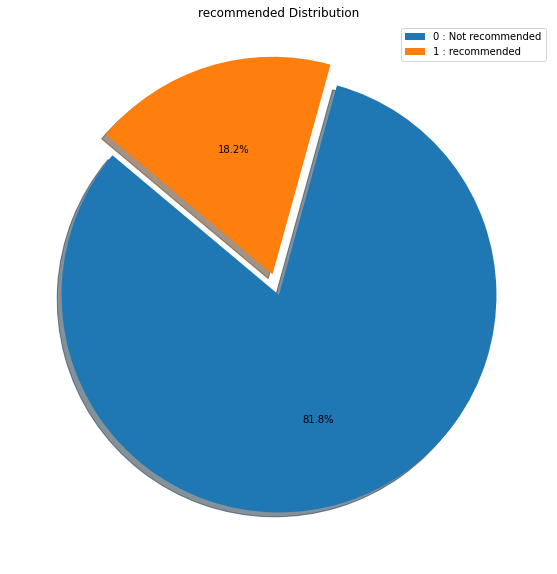

In [54]:
print(df_eda['recommended'].value_counts())

plt.figure(figsize=(10,10))

explode = [0,0.1]
plt.pie(df_eda['recommended'].value_counts(), explode=explode,autopct='%1.1f%%', shadow=True,startangle=140)
plt.legend(labels=['0 : Not recommended','1 : recommended'])
plt.title('recommended Distribution')
plt.axis('off');

### IDV

+----------------+------------+
|                |   division |
|----------------+------------|
| General        |      11664 |
| General Petite |       6778 |
| Initmates      |       1220 |
+----------------+------------+


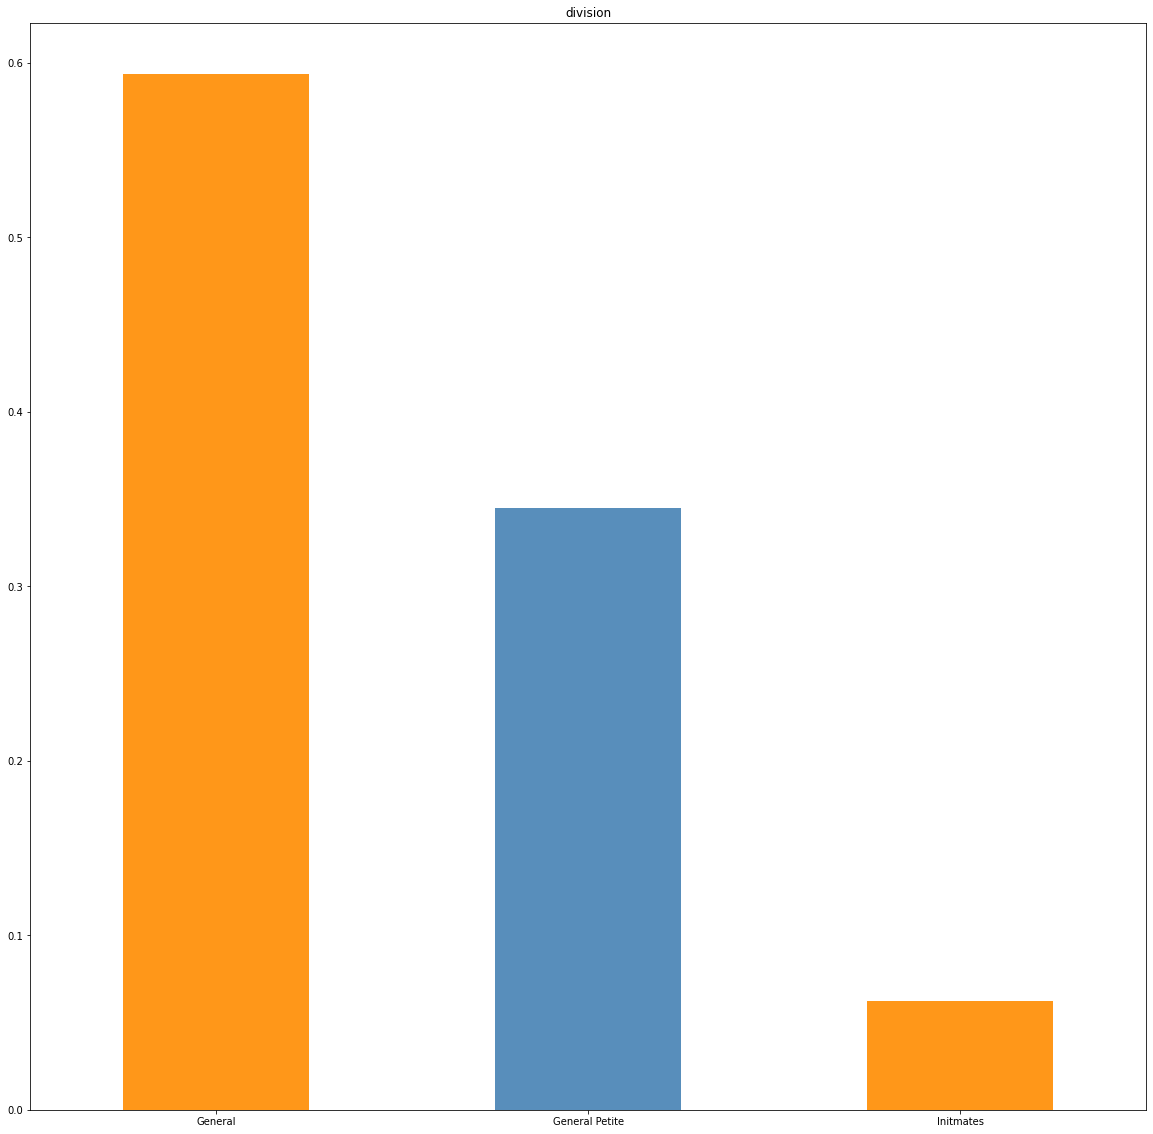

+----------+--------------+
|          |   department |
|----------+--------------|
| Tops     |         8713 |
| Dresses  |         5371 |
| Bottoms  |         3184 |
| Intimate |         1408 |
| Jackets  |          879 |
| Trend    |          107 |
+----------+--------------+


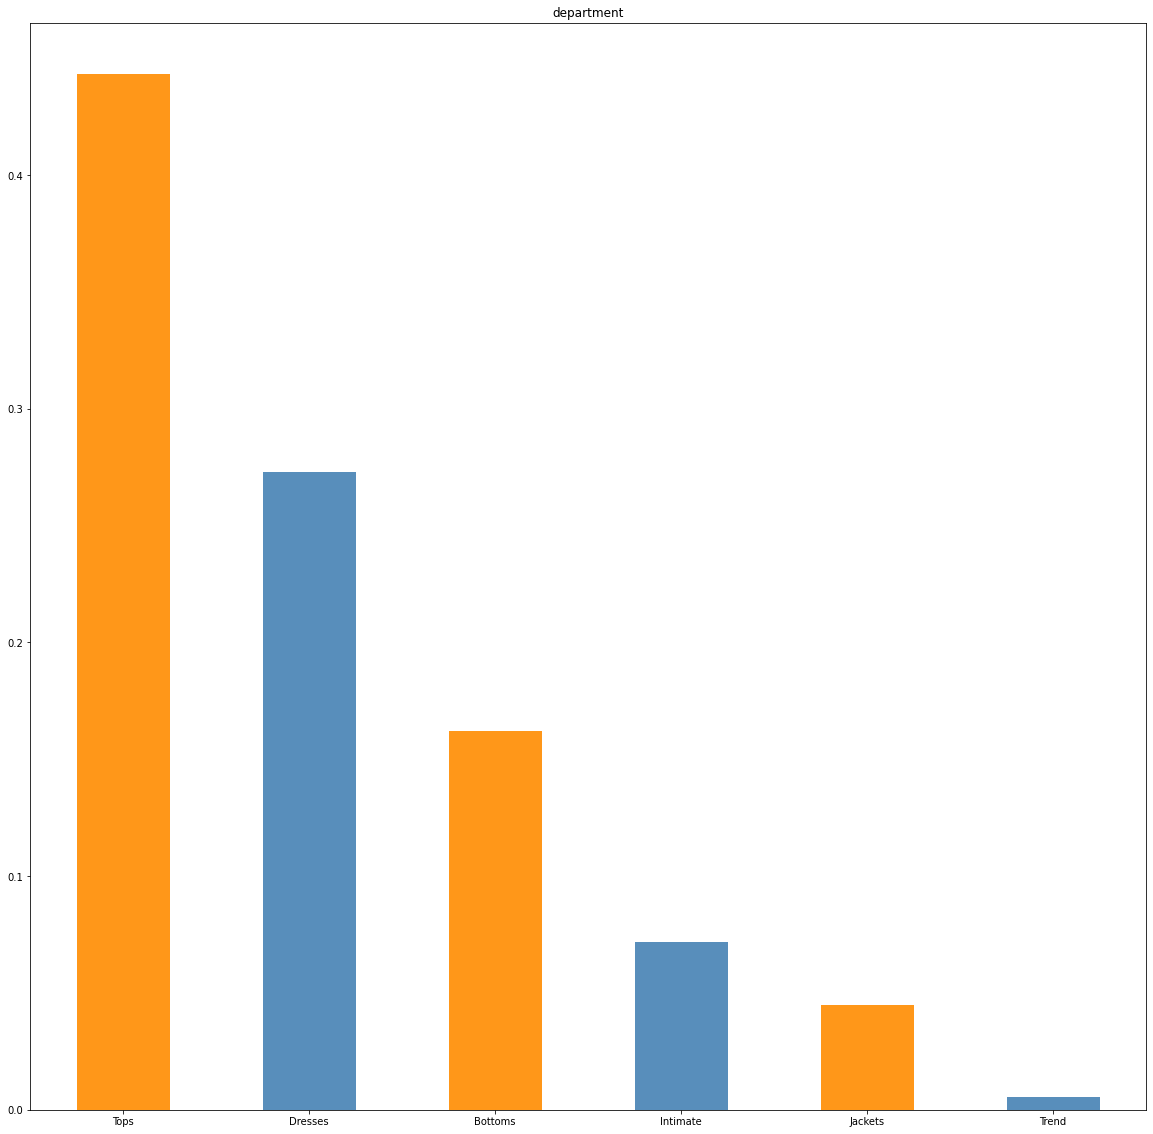

+----------------+---------+
|                |   class |
|----------------+---------|
| Dresses        |    5371 |
| Knits          |    3981 |
| Blouses        |    2587 |
| Sweaters       |    1218 |
| Pants          |    1157 |
| Jeans          |     970 |
| Fine gauge     |     927 |
| Skirts         |     796 |
| Jackets        |     598 |
| Lounge         |     574 |
| Swim           |     293 |
| Outerwear      |     281 |
| Shorts         |     260 |
| Sleep          |     174 |
| Legwear        |     131 |
| Intimates      |     120 |
| Layering       |     115 |
| Trend          |     107 |
| Casual bottoms |       1 |
| Chemises       |       1 |
+----------------+---------+


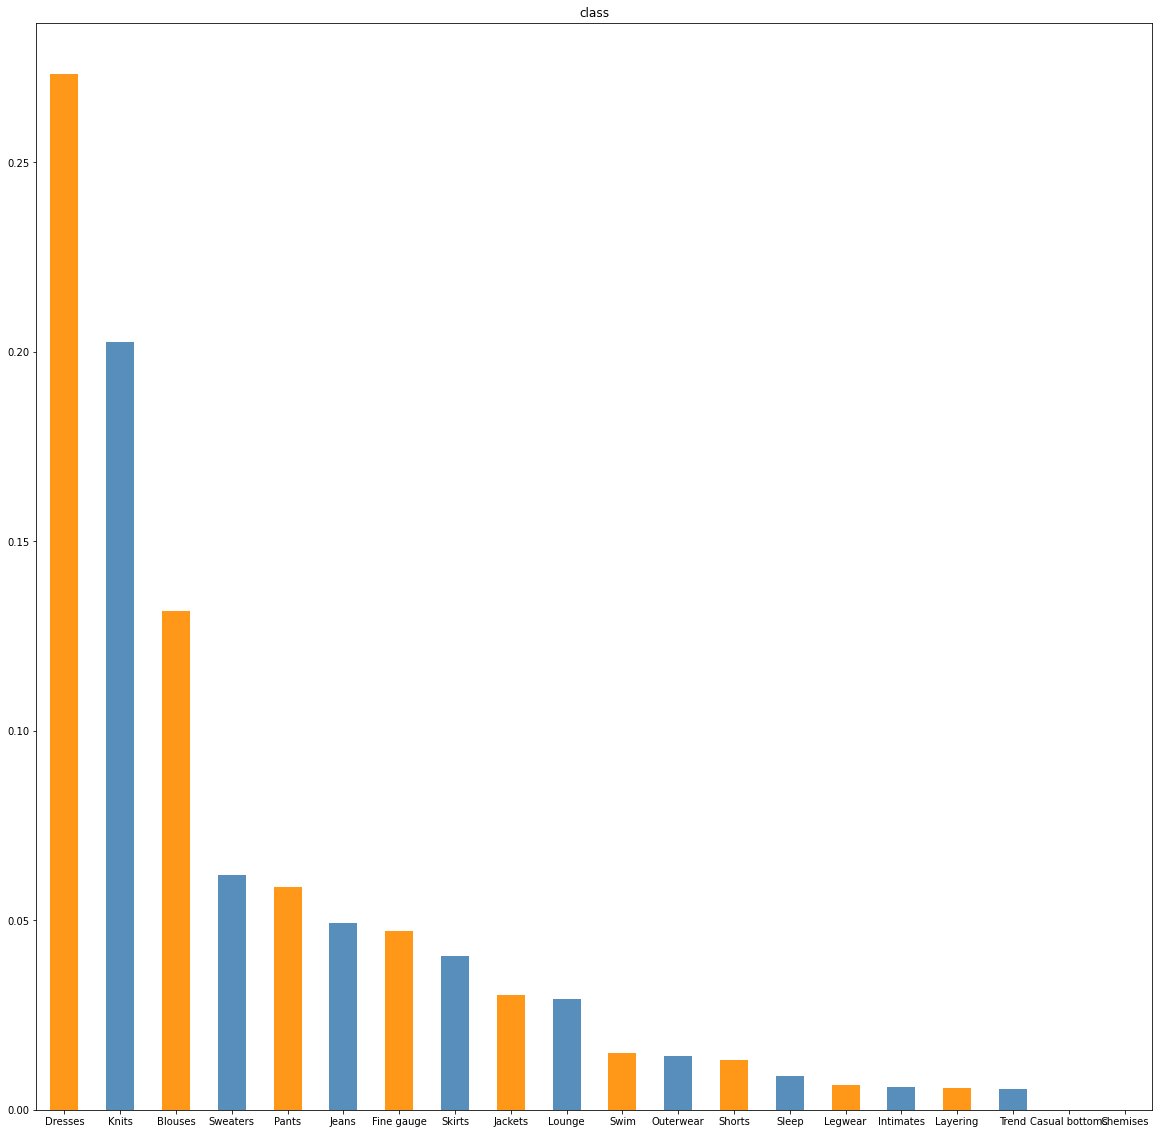

In [55]:
obj_EDA(df_eda, Objcols)


### IDV - DV

Variable Name:  division


Variable Name:  department


Variable Name:  class


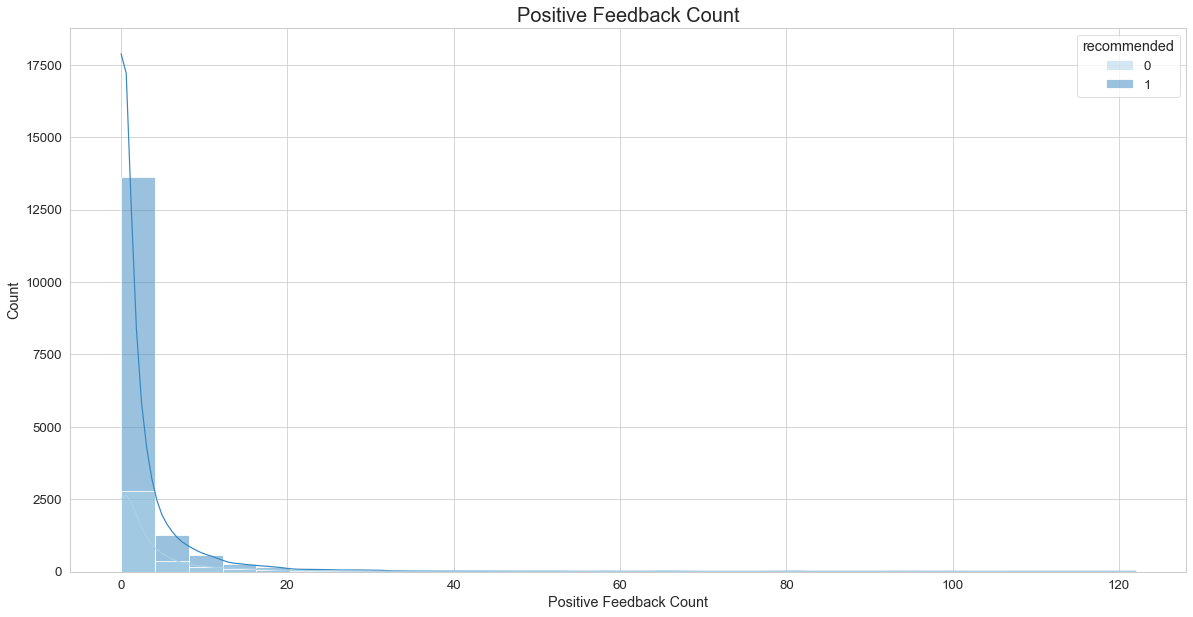

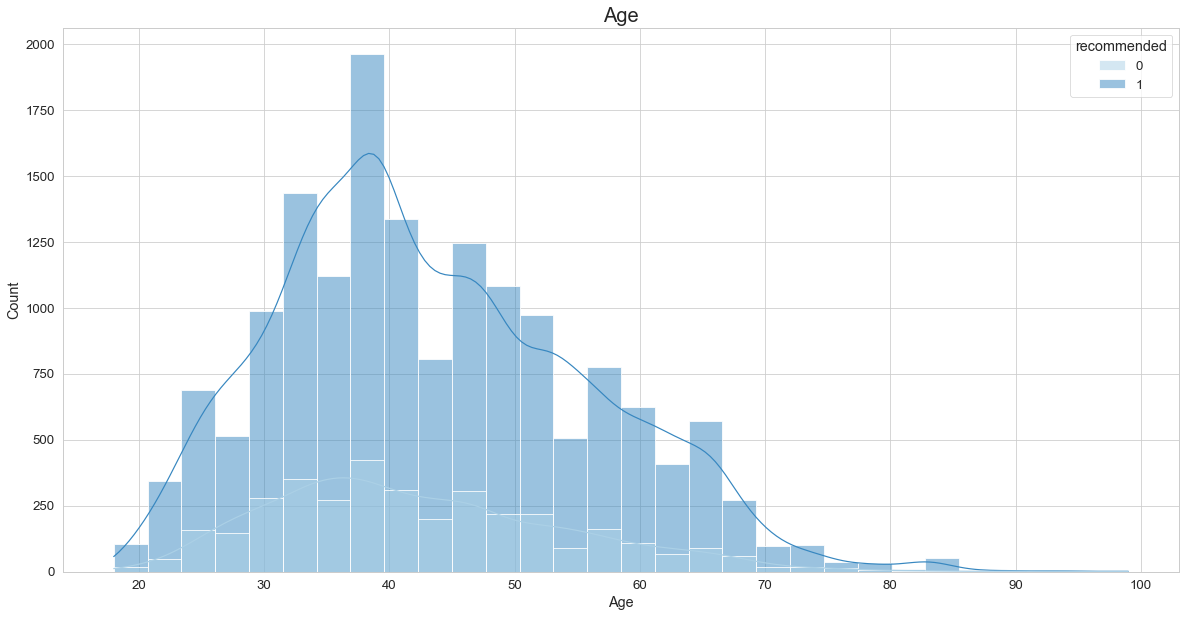

In [56]:
EDA_obj(df_eda, Objcols, 'recommended')
EDA_num_with_DV(df, NUMcols, 'recommended')

## Word Cloud

In [57]:
positive_words =" ".join(df_new[df_new["recommended"] == '1'].text).split()
len(positive_words)

467048

In [58]:
negative_words =" ".join(df_new[df_new["recommended"] == '0'].text).split()
len(negative_words)

104433

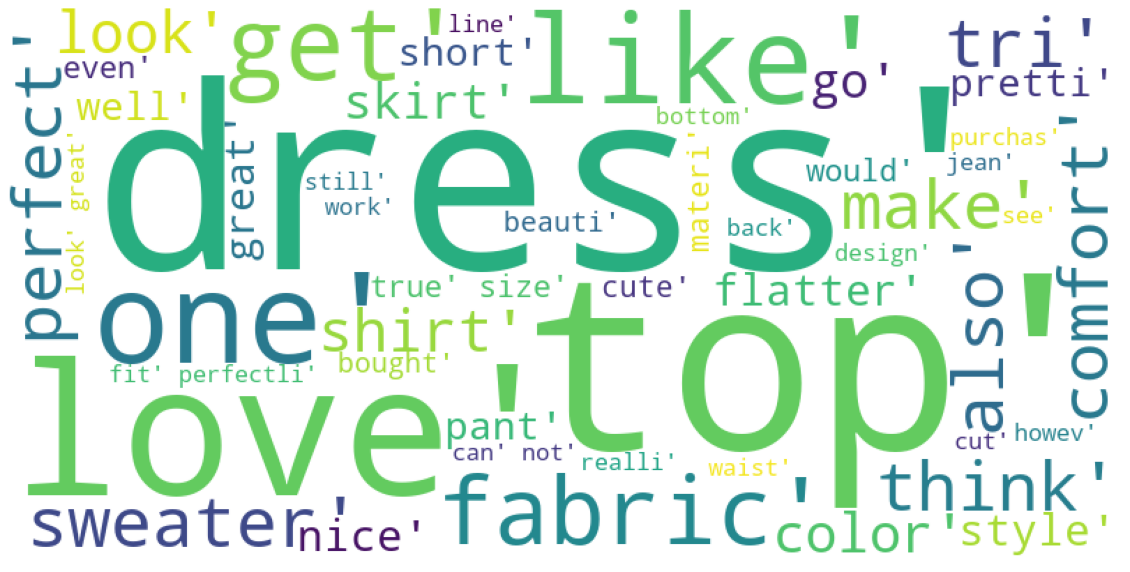

In [59]:
wordcloud = WordCloud(width = 800, height = 400, background_color = "white", max_words = 50).generate(str(positive_words))

plt.figure(figsize = (20, 20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

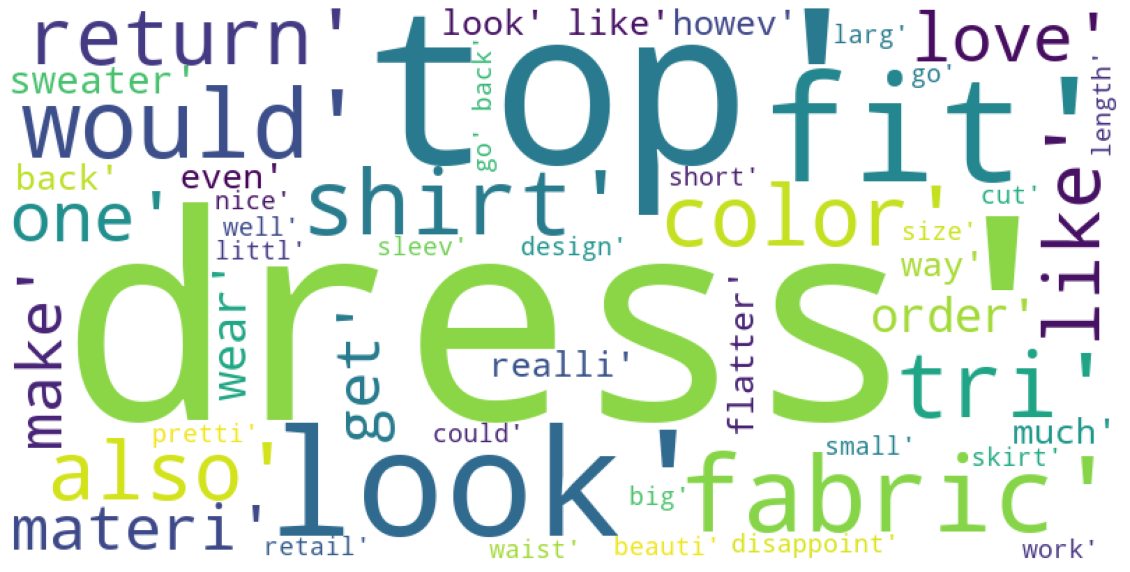

In [60]:
wordcloud = WordCloud(width = 800, height = 400, background_color = "white", max_words = 50).generate(str(negative_words))

plt.figure(figsize = (20, 20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## Tokenizing

In [61]:
# df_new_new['text'] = df_new_new['text'].apply(lambda x : nltk.word_tokenize(x))

In [62]:
# print(tabulate(df_new_new.head(25), headers = 'keys', tablefmt = 'psql'))

# VADER Seniment Scoring

In [63]:
df_3_new = df_new.reset_index()

In [64]:
df_3_new = df_3_new.rename(columns = 
            {
            'index' : 'Id'})

In [65]:
pd.DataFrame(df_3_new.head(3))

,Id,recommended,text,Positive Feedback Count,division,department,class,Age
0,0,0,high hope dress realli want work initi order petit small usual size found small small fact could zip reorder petit medium ok overal top half comfort fit nice bottom half tight layer sever somewhat...,0,General,Dresses,Dresses,60
1,1,1,love love love jumpsuit fun flirti fabul everi time wear get noth great compliment,0,General Petite,Bottoms,Pants,50
2,2,1,shirt flatter due adjust front tie perfect length wear leg sleeveless pair well cardigan love shirt,6,General,Tops,Blouses,47


In [66]:
# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(df_3_new.iterrows(), total=len(df_3_new)):
    text = row['text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/19662 [00:00<?, ?it/s]

In [67]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df_3_new, how='left')

In [68]:
vaders.head(3)

,Id,neg,neu,pos,compound,recommended,text,Positive Feedback Count,division,department,class,Age
0,0,0.000,0.709,0.291,0.919,0,high hope dress realli want work initi order petit small usual size found small small fact could zip reorder petit medium ok overal top half comfort fit nice bottom half tight layer sever somewhat...,0,General,Dresses,Dresses,60
1,1,0.000,0.257,0.743,0.975,1,love love love jumpsuit fun flirti fabul everi time wear get noth great compliment,0,General Petite,Bottoms,Pants,50
2,2,0.000,0.513,0.487,0.886,1,shirt flatter due adjust front tie perfect length wear leg sleeveless pair well cardigan love shirt,6,General,Tops,Blouses,47


# Data Splitting & (Voctrization - TFIDF)

In [69]:
def Convert_Data_Type_to_int(Con_df_int, colU):
    Con_df_int[colU] = pd.to_numeric(Con_df_int[colU], errors='coerce') 
    print ('\nData Type Changed to Numerical for Variable: [', colU , '] Data type now is: ' , Con_df_int[colU].dtype)

    return Con_df_int

In [70]:
df_new = Convert_Data_Type_to_int(df_new, 'recommended')


Data Type Changed to Numerical for Variable: [ recommended ] Data type now is:  int64


In [71]:
X = df_new["text"].values
y = df_new["recommended"].map({0:1, 1:0}).values

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 101)

print('X_train: ', X_train.shape)
print('y_train: ', y_train.shape)

print('X_test: ', X_test.shape)
print('y_test: ', y_test.shape)

X_train:  (15729,)
y_train:  (15729,)
X_test:  (3933,)
y_test:  (3933,)


In [73]:
X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)
pd.DataFrame(X_train_count)

,0
0,"(0, 3279)\t1\n (0, 3685)\t1\n (0, 3457)\t1\n (0, 2703)\t1\n (0, 2685)\t1\n (0, 4354)\t1\n (0, 4062)\t1\n (0, 366)\t1\n (0, 1769)\t1\n (0, 2379)\t1\n (0, 1006)\t1\n (0, 1139)\t1\n (0,..."
1,"(0, 3685)\t1\n (0, 3457)\t1\n (0, 366)\t1\n (0, 1769)\t1\n (0, 1510)\t1\n (0, 1585)\t1\n (0, 210)\t1\n (0, 3798)\t1\n (0, 497)\t1\n (0, 1989)\t2\n (0, 2834)\t2\n (0, 3330)\t1\n (0, 1..."
2,"(0, 3685)\t1\n (0, 366)\t1\n (0, 3906)\t1\n (0, 2317)\t1\n (0, 4018)\t2\n (0, 2128)\t1\n (0, 1209)\t1\n (0, 1150)\t1\n (0, 1075)\t1\n (0, 2633)\t1\n (0, 4351)\t1\n (0, 302)\t1\n (0, ..."
3,"(0, 1769)\t1\n (0, 3798)\t3\n (0, 1986)\t1\n (0, 4254)\t1\n (0, 1599)\t1\n (0, 2317)\t1\n (0, 2970)\t2\n (0, 2334)\t1\n (0, 1870)\t1\n (0, 2188)\t1\n (0, 1494)\t1\n (0, 2971)\t1\n (0..."
4,"(0, 2703)\t2\n (0, 2685)\t1\n (0, 966)\t1\n (0, 2317)\t1\n (0, 2128)\t3\n (0, 3916)\t1\n (0, 2334)\t1\n (0, 2188)\t1\n (0, 2371)\t1\n (0, 3169)\t1\n (0, 4196)\t1\n (0, 3830)\t1\n (0,..."
...,...
15724,"(0, 3457)\t2\n (0, 1619)\t1\n (0, 3798)\t1\n (0, 3022)\t1\n (0, 1599)\t1\n (0, 966)\t1\n (0, 2633)\t1\n (0, 2334)\t1\n (0, 3173)\t1\n (0, 1586)\t1\n (0, 2421)\t1\n (0, 3773)\t1\n (0,..."
15725,"(0, 1619)\t1\n (0, 3022)\t2\n (0, 966)\t1\n (0, 4348)\t1\n (0, 2334)\t1\n (0, 2371)\t1\n (0, 1880)\t1\n (0, 2840)\t1\n (0, 2680)\t1\n (0, 4371)\t1\n (0, 1689)\t1\n (0, 1469)\t1\n (0,..."
15726,"(0, 3906)\t1\n (0, 368)\t1\n (0, 2545)\t1\n (0, 2334)\t1\n (0, 3169)\t1\n (0, 674)\t1\n (0, 4242)\t1\n (0, 1595)\t1\n (0, 1879)\t1\n (0, 3280)\t1\n (0, 3949)\t1\n (0, 3387)\t2\n (0, ..."
15727,"(0, 3457)\t3\n (0, 1769)\t1\n (0, 1806)\t1\n (0, 2605)\t1\n (0, 4254)\t1\n (0, 987)\t1\n (0, 1535)\t1\n (0, 368)\t1\n (0, 1782)\t1\n (0, 3173)\t1\n (0, 4259)\t1\n (0, 3484)\t1\n (0, ..."


In [74]:
X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)
pd.DataFrame(X_train_tf_idf)

,0
0,"(0, 1619)\t0.1914338079240869\n (0, 1139)\t0.4183227823883578\n (0, 1006)\t0.270962737141984\n (0, 2379)\t0.2698915102999504\n (0, 1769)\t0.18019070450037278\n (0, 366)\t0.33889246598218165..."
1,"(0, 2317)\t0.057574376868584014\n (0, 3016)\t0.18286086790212774\n (0, 4070)\t0.12602641042272048\n (0, 2712)\t0.14157874383978544\n (0, 2090)\t0.14255198307662129\n (0, 310)\t0.12622869201..."
2,"(0, 1176)\t0.19189063504693155\n (0, 2464)\t0.12979548320740336\n (0, 3042)\t0.1928532844399869\n (0, 2849)\t0.11721424071649578\n (0, 2310)\t0.2658056114815452\n (0, 2545)\t0.0945062102939..."
3,"(0, 1587)\t0.13081189850990121\n (0, 2421)\t0.09869126345472012\n (0, 2211)\t0.09255940467960228\n (0, 2627)\t0.1093937984540282\n (0, 3169)\t0.1014789332352095\n (0, 3132)\t0.2413844259542..."
4,"(0, 1431)\t0.15573072523906786\n (0, 1880)\t0.15299006076035115\n (0, 2983)\t0.15426102784794896\n (0, 2473)\t0.1928310627024831\n (0, 2847)\t0.1265402989028675\n (0, 1479)\t0.1758839589567..."
...,...
15724,"(0, 407)\t0.2596208741875785\n (0, 2377)\t0.28380352225448996\n (0, 1085)\t0.272279269783557\n (0, 721)\t0.22604979726630378\n (0, 3361)\t0.24433216462206078\n (0, 1582)\t0.1805778908930120..."
15725,"(0, 720)\t0.26300507326009825\n (0, 3277)\t0.2195342690332749\n (0, 805)\t0.258435145808345\n (0, 415)\t0.24503566403445898\n (0, 1773)\t0.19678834025232828\n (0, 2512)\t0.1947429881479015\..."
15726,"(0, 3254)\t0.3965826627725129\n (0, 3421)\t0.30989092056507794\n (0, 4143)\t0.36555691680729746\n (0, 544)\t0.3633248451195061\n (0, 3387)\t0.33025141703267513\n (0, 3949)\t0.18424847741383..."
15727,"(0, 1276)\t0.3202550157871641\n (0, 404)\t0.18220061754133146\n (0, 1622)\t0.2240604522234713\n (0, 2080)\t0.1995654185114932\n (0, 3083)\t0.1987878787177119\n (0, 2589)\t0.1372423097112190..."


# Machine Learning Models 

## Machine Learning Libraries

In [75]:
# sklearn Classifiers Evaluation libraries
from sklearn.metrics import classification_report # To get classification report
from sklearn.metrics import confusion_matrix # To get the confusion matrix
from sklearn.metrics import accuracy_score # To get the accuracy score 

# Supervised Machine Learning Models

## Random Forest Classifiers
from sklearn.ensemble import RandomForestClassifier

## Gradient Boosting Classifier 
from sklearn.ensemble import GradientBoostingClassifier
## Histogram-based Gradient Boosting Classification Tree
from sklearn.ensemble import HistGradientBoostingClassifier
## AdaBoost Classifier
from sklearn.ensemble import AdaBoostClassifier

## Extra Trees Classifier
from sklearn.ensemble import ExtraTreesClassifier

## K-Nearest Neighbors Classifier
from sklearn.neighbors import KNeighborsClassifier

## Naive Bayes Classifiers
from sklearn.naive_bayes import GaussianNB # DV
## Naive Bayes classifier for multivariate Bernoulli models
from sklearn.naive_bayes import BernoulliNB # 2 | 3 DV
## The Complement Naive Bayes classifier
from sklearn.naive_bayes import ComplementNB # 3 DV
## Naive Bayes classifier for multinomial models
from sklearn.naive_bayes import MultinomialNB # 3 DV
## Naive Bayes classifier for categorical features
from sklearn.naive_bayes import CategoricalNB # 3 DV

## Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

## Logistic Regression Classifiers
from sklearn.linear_model import LogisticRegression
## Logistic Regression CV classifier
from sklearn.linear_model import LogisticRegressionCV
## Linear classifiers with stochastic gradient descent SGD training.
from sklearn.linear_model import SGDClassifier
## Linear Perceptron Classifier
from sklearn.linear_model import Perceptron

## XGBoost Classifiers
from xgboost import XGBClassifier

## Support Vector Machines Classifiers
from sklearn.svm import SVC
## Linear Support Vector Classification
from sklearn.svm import LinearSVC

## Multilayer Perceptron Classifier
from sklearn.neural_network import MLPClassifier

## Build the Models using CPU 'Voctrization'

In [81]:
# Random Forest Classifier
rf_m_1_cpu = RandomForestClassifier().fit(X_train_count, y_train)
print ('Random Forest Classifier Built')

Random Forest Classifier Built


In [79]:
# Gradient Boosting Classifier
gb_m_1_cpu = GradientBoostingClassifier().fit(X_train_count, y_train)
print ('Gradient Boosting Classifier Built')

Gradient Boosting Classifier Built


In [76]:
# AdaBoost Classifier
ad_m_1_cpu = AdaBoostClassifier().fit(X_train_count, y_train)
print ('AdaBoost Classifier Built')

AdaBoost Classifier Built


In [82]:
# Extra Trees Classifier
et_m_1_cpu = ExtraTreesClassifier().fit(X_train_count, y_train)
print ('Extra Trees Classifier Built')

Extra Trees Classifier Built


In [83]:
# K Neighbors Classifier
knn_m_1_cpu = KNeighborsClassifier().fit(X_train_count, y_train)
print ('K Neighbors Classifier Classifiers Built')

K Neighbors Classifier Classifiers Built


In [85]:
# Naive Bayes Classifier for Multivariate Bernoulli
bnb_m_1_cpu = BernoulliNB().fit(X_train_count, y_train)
print ('Naive Bayes Classifier for Multivariate Bernoulli Built')

Naive Bayes Classifier for Multivariate Bernoulli Built


In [86]:
# Decision Tree Classifier
dt_m_1_cpu = DecisionTreeClassifier().fit(X_train_count, y_train)
print ('Decision Tree Classifier Built')

Decision Tree Classifier Built


In [78]:
# Logistic Regression Classifier
lg_m_1_cpu = LogisticRegression().fit(X_train_count, y_train)
print ('Logistic Regression Classifier Built')

Logistic Regression Classifier Built


In [87]:
# Logistic Regression CV Classifier
lgcv_m_1_cpu = LogisticRegressionCV().fit(X_train_count, y_train)
print ('Logistic Regression CV Classifier Built')

Logistic Regression CV Classifier Built


In [88]:
# Stochastic Gradient Descent Classifier
sgdc_m_1_cpu = SGDClassifier().fit(X_train_count, y_train)
print ('Stochastic Gradient Descent Classifier Built')

Stochastic Gradient Descent Classifier Built


In [89]:
# Linear Perceptron Classifier
lpc_m_1_cpu = Perceptron().fit(X_train_count, y_train)
print ('Linear Perceptron Classifier Built')

Linear Perceptron Classifier Built


In [90]:
# XGBoost Classifiers
xgb_m_1_cpu = XGBClassifier().fit(X_train_count, y_train)
print ('XGBoost Classifier Built')

XGBoost Classifier Built


In [91]:
# Support Vector Machines Classifiers
svm_m_1_cpu = SVC().fit(X_train_count, y_train)
print ('Support Vector Machines Classifiers Built')

Support Vector Machines Classifiers Built


In [92]:
# Linear Support Vector Classification
lsvm_m_1_cpu = LinearSVC().fit(X_train_count, y_train)
print ('Linear Support Vector Classification Built')

Linear Support Vector Classification Built


In [93]:
# Multilayer Perceptron Classifier
mlp_m_1_cpu = MLPClassifier().fit(X_train_count, y_train)
print ('Multilayer Perceptron Classifier Built')

Multilayer Perceptron Classifier Built


## Predict y_test Using CPU 'Voctrization'

In [94]:
# Random Forest Classifier
rf_m_1_pred_vaild_cpu = rf_m_1_cpu.predict(X_test_count)

# Gradient Boosting Classifier
gb_m_1_pred_vaild_cpu = gb_m_1_cpu.predict(X_test_count)

# AdaBoost Classifier
ad_m_1_pred_vaild_cpu = ad_m_1_cpu.predict(X_test_count)

# Extra Trees Classifier
et_m_1_pred_vaild_cpu = et_m_1_cpu.predict(X_test_count)

# K Neighbors Classifier
knn_m_1_pred_vaild_cpu = knn_m_1_cpu.predict(X_test_count)

# Naive Bayes Classifier for Multivariate Bernoulli
bnb_m_1_pred_vaild_cpu = bnb_m_1_cpu.predict(X_test_count)

# Decision Tree Classifier
dt_m_1_pred_vaild_cpu = dt_m_1_cpu.predict(X_test_count)

# Logistic Regression Classifier
lg_m_1_pred_vaild_cpu = lg_m_1_cpu.predict(X_test_count)

# Logistic Regression CV Classifier
lgcv_m_1_pred_vaild_cpu =  lgcv_m_1_cpu.predict(X_test_count)

# Stochastic Gradient Descent Classifier
sgdc_m_1_pred_vaild_cpu =  sgdc_m_1_cpu.predict(X_test_count)

# Linear Perceptron Classifier
lpc_m_1_pred_vaild_cpu =  lpc_m_1_cpu.predict(X_test_count)

# XGBoost Classifiers
xgb_m_1_pred_vaild_cpu = xgb_m_1_cpu.predict(X_test_count)

# Support Vector Machines Classifiers
svm_m_1_pred_vaild_cpu = svm_m_1_cpu.predict(X_test_count)

# Linear Support Vector Classification
lsvm_m_1_pred_vaild_cpu = lsvm_m_1_cpu.predict(X_test_count)

# Multilayer Perceptron Classifier
mlp_m_1_pred_vaild_cpu = mlp_m_1_cpu.predict(X_test_count)


## Evaluate the Models CPU 'Voctrization'

### Accuracy Score

In [96]:
# Random Forest Classifier
Valid_accuracy_rf_m_1_cpu = accuracy_score(y_test, rf_m_1_pred_vaild_cpu)

# Gradient Boosting Classifier
Valid_accuracy_gb_m_1_cpu = accuracy_score(y_test, gb_m_1_pred_vaild_cpu)

# AdaBoost Classifier
Valid_accuracy_ad_m_1_cpu = accuracy_score(y_test, ad_m_1_pred_vaild_cpu)

# Extra Trees Classifier
Valid_accuracy_et_m_1_cpu = accuracy_score(y_test, et_m_1_pred_vaild_cpu)

# K Neighbors Classifier
Valid_accuracy_knn_m_1_cpu = accuracy_score(y_test, knn_m_1_pred_vaild_cpu)

# Naive Bayes Classifier for Multivariate Bernoulli
Valid_accuracy_bnb_m_1_cpu = accuracy_score(y_test, bnb_m_1_pred_vaild_cpu)

# Decision Tree Classifier
Valid_accuracy_dt_m_1_cpu = accuracy_score(y_test, dt_m_1_pred_vaild_cpu)

# Logistic Regression Classifier
Valid_accuracy_lg_m_1_cpu = accuracy_score(y_test, lg_m_1_pred_vaild_cpu)

# Logistic Regression CV Classifier
Valid_accuracy_lgcv_m_1_cpu = accuracy_score(y_test, lgcv_m_1_pred_vaild_cpu)

# Stochastic Gradient Descent Classifier
Valid_accuracy_sgdc_m_1_cpu = accuracy_score(y_test, sgdc_m_1_pred_vaild_cpu)

# Linear Perceptron Classifier
Valid_accuracy_lpc_m_1_cpu = accuracy_score(y_test, lpc_m_1_pred_vaild_cpu)

# XGBoost Classifiers
Valid_accuracy_xgb_m_1_cpu = accuracy_score(y_test, xgb_m_1_pred_vaild_cpu)

# Support Vector Machines Classifiers
Valid_accuracy_svm_m_1_cpu = accuracy_score(y_test, svm_m_1_pred_vaild_cpu)

# Linear Support Vector Classification
Valid_accuracy_lsvm_m_1_cpu = accuracy_score(y_test, lsvm_m_1_pred_vaild_cpu)

# Multilayer Perceptron Classifier
Valid_accuracy_mlp_m_1_cpu = accuracy_score(y_test, mlp_m_1_pred_vaild_cpu)

cpu_ml_m_1_valid_compare = pd.DataFrame({"Voctrization CPU Models": [
                                "Random Forest Classifier", 
                                "Gradient Boosting Classifier",
                                "AdaBoost Classifier",
                                "Extra Trees Classifier",
                                "K Neighbors Classifier",
                                "Naive Bayes Classifier for Multivariate Bernoulli",
                                "Decision Tree Classifier",
                                "Logistic Regression Classifier",
                                "Logistic Regression CV Classifier",
                                "Stochastic Gradient Descent Classifier",
                                "Linear Perceptron Classifier",
                                "XGBoost Classifiers",
                                "Support Vector Machines Classifiers",
                                "Linear Support Vector Classification",
                                "Multilayer Perceptron Classifier"
                                ],

                "Voctrization CPU Models Accuracy": [
                                Valid_accuracy_rf_m_1_cpu, 
                                Valid_accuracy_gb_m_1_cpu,
                                Valid_accuracy_ad_m_1_cpu,
                                Valid_accuracy_et_m_1_cpu,
                                Valid_accuracy_knn_m_1_cpu,
                                Valid_accuracy_bnb_m_1_cpu,
                                Valid_accuracy_dt_m_1_cpu,
                                Valid_accuracy_lg_m_1_cpu,
                                Valid_accuracy_lgcv_m_1_cpu,
                                Valid_accuracy_sgdc_m_1_cpu,
                                Valid_accuracy_lpc_m_1_cpu,
                                Valid_accuracy_xgb_m_1_cpu,
                                Valid_accuracy_svm_m_1_cpu,
                                Valid_accuracy_lsvm_m_1_cpu,
                                Valid_accuracy_mlp_m_1_cpu
                                ],
                        })  
                                
print(tabulate(cpu_ml_m_1_valid_compare.sort_values(by="Voctrization CPU Models Accuracy", ascending=False), headers = 'keys', tablefmt = 'psql'))
fig = px.bar(cpu_ml_m_1_valid_compare.sort_values(by="Voctrization CPU Models Accuracy", ascending=True), x = "Voctrization CPU Models Accuracy", y = "Voctrization CPU Models", title = "Voctrization Machines Learning Validation Accuracy")
fig.show()

+----+---------------------------------------------------+------------------------------------+
|    | Voctrization CPU Models                           |   Voctrization CPU Models Accuracy |
|----+---------------------------------------------------+------------------------------------|
|  7 | Logistic Regression Classifier                    |                           0.886855 |
|  8 | Logistic Regression CV Classifier                 |                           0.886092 |
| 12 | Support Vector Machines Classifiers               |                           0.881261 |
|  9 | Stochastic Gradient Descent Classifier            |                           0.87999  |
| 11 | XGBoost Classifiers                               |                           0.878464 |
|  5 | Naive Bayes Classifier for Multivariate Bernoulli |                           0.874396 |
| 14 | Multilayer Perceptron Classifier                  |                           0.871345 |
| 13 | Linear Support Vector Classificat

### Classification Report and Confusion Matrix

#### Random Forest Classifier

Model Random Forest Classifier Validation Classification Report:
                precision    recall  f1-score   support

           0      0.850     0.991     0.915      3218
           1      0.841     0.214     0.341       715

    accuracy                          0.850      3933
   macro avg      0.845     0.602     0.628      3933
weighted avg      0.848     0.850     0.811      3933



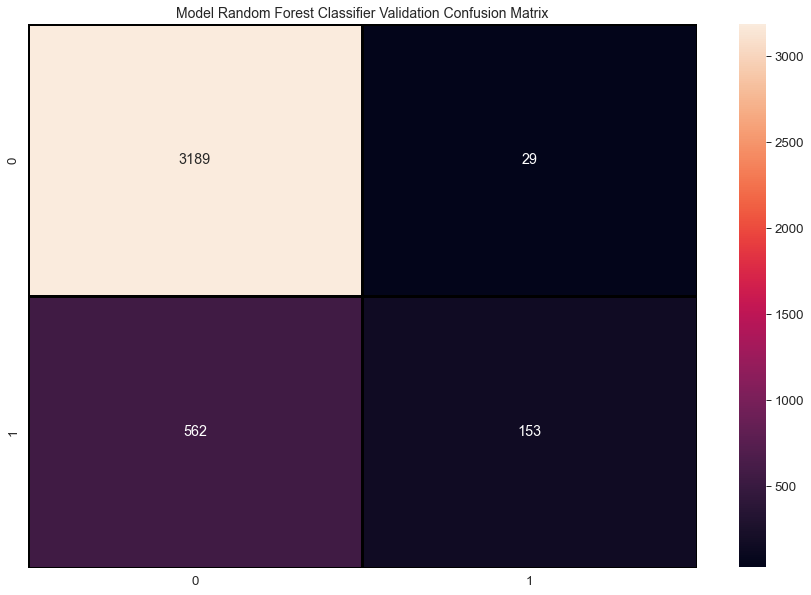

In [97]:
print('Model Random Forest Classifier Validation Classification Report:\n ', classification_report(y_test, rf_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, rf_m_1_pred_vaild_cpu),
            annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("Model Random Forest Classifier Validation Confusion Matrix",fontsize=14)
plt.show()

#### Gradient Boosting Classifier

Model Gradient Boosting Classifier Validation Classification Report:
                precision    recall  f1-score   support

           0      0.865     0.980     0.919      3218
           1      0.775     0.313     0.446       715

    accuracy                          0.859      3933
   macro avg      0.820     0.647     0.683      3933
weighted avg      0.849     0.859     0.833      3933



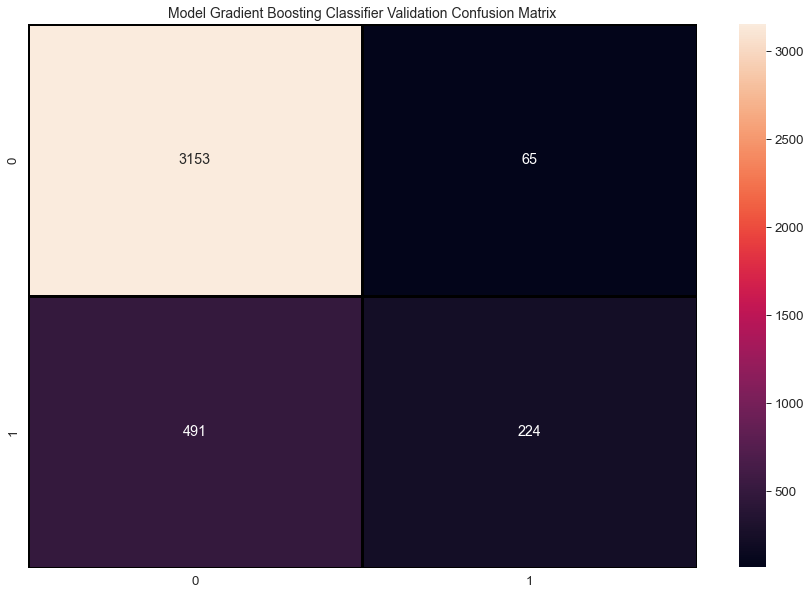

In [98]:
print('Model Gradient Boosting Classifier Validation Classification Report:\n ', classification_report(y_test, gb_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, gb_m_1_pred_vaild_cpu),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Model Gradient Boosting Classifier Validation Confusion Matrix",fontsize=14)
plt.show()

#### AdaBoost Classifier

Model AdaBoost Classifier Validation Classification Report:
                precision    recall  f1-score   support

           0      0.888     0.956     0.921      3218
           1      0.699     0.459     0.554       715

    accuracy                          0.866      3933
   macro avg      0.794     0.707     0.738      3933
weighted avg      0.854     0.866     0.854      3933



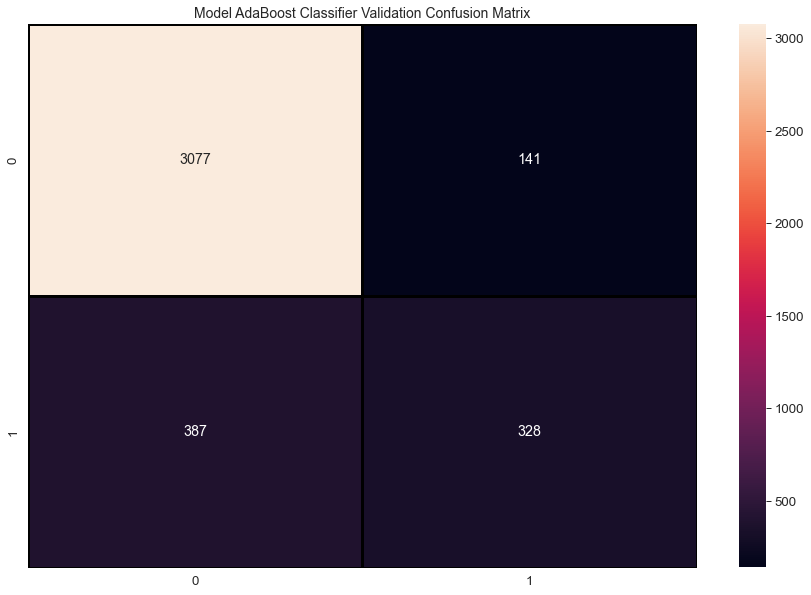

In [100]:
print('Model AdaBoost Classifier Validation Classification Report:\n ', classification_report(y_test, ad_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, ad_m_1_pred_vaild_cpu),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Model AdaBoost Classifier Validation Confusion Matrix",fontsize=14)
plt.show()

#### Extra Trees Classifier

Model Extra Trees Classifier Validation Classification Report:
                precision    recall  f1-score   support

           0      0.855     0.991     0.918      3218
           1      0.861     0.242     0.378       715

    accuracy                          0.855      3933
   macro avg      0.858     0.617     0.648      3933
weighted avg      0.856     0.855     0.820      3933



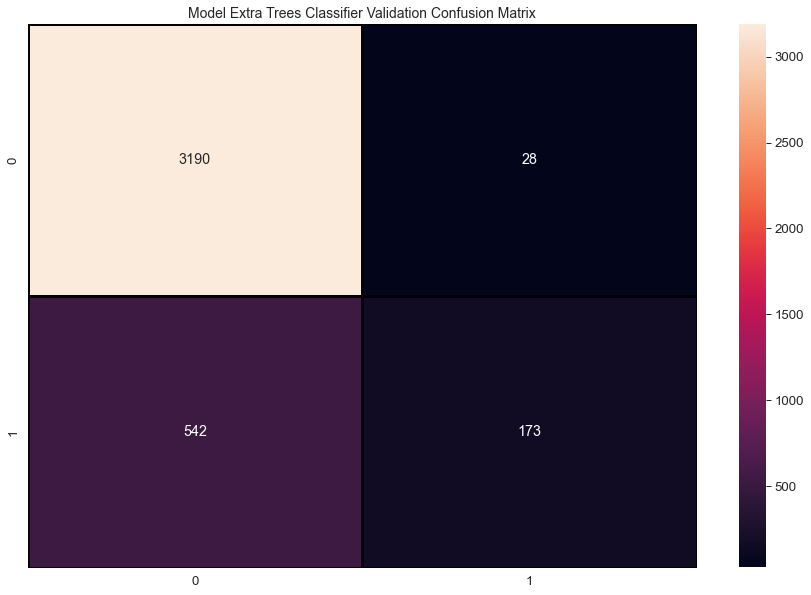

In [101]:
print('Model Extra Trees Classifier Validation Classification Report:\n ', classification_report(y_test, et_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, et_m_1_pred_vaild_cpu),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Model Extra Trees Classifier Validation Confusion Matrix",fontsize=14)
plt.show()

#### K Neighbors Classifier

Model K Neighbors Classifier Validation Classification Report:
                precision    recall  f1-score   support

           0      0.833     0.977     0.899      3218
           1      0.535     0.119     0.195       715

    accuracy                          0.821      3933
   macro avg      0.684     0.548     0.547      3933
weighted avg      0.779     0.821     0.771      3933



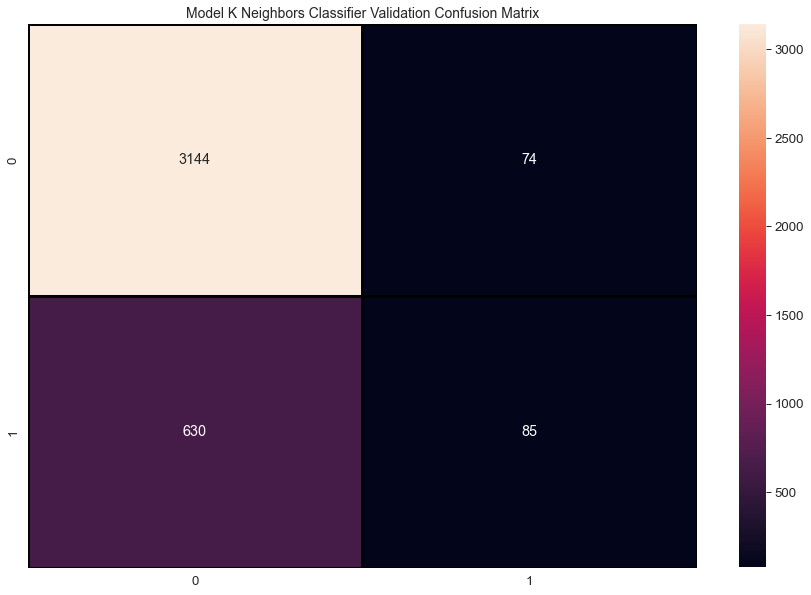

In [102]:
print('Model K Neighbors Classifier Validation Classification Report:\n ', classification_report(y_test, knn_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, knn_m_1_pred_vaild_cpu),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Model K Neighbors Classifier Validation Confusion Matrix",fontsize=14)
plt.show()

#### Naive Bayes Classifier for Multivariate Bernoulli

Model Naive Bayes Classifier for Multivariate Bernoulli Validation Classification Report:
                precision    recall  f1-score   support

           0      0.935     0.910     0.922      3218
           1      0.638     0.713     0.674       715

    accuracy                          0.874      3933
   macro avg      0.786     0.812     0.798      3933
weighted avg      0.881     0.874     0.877      3933



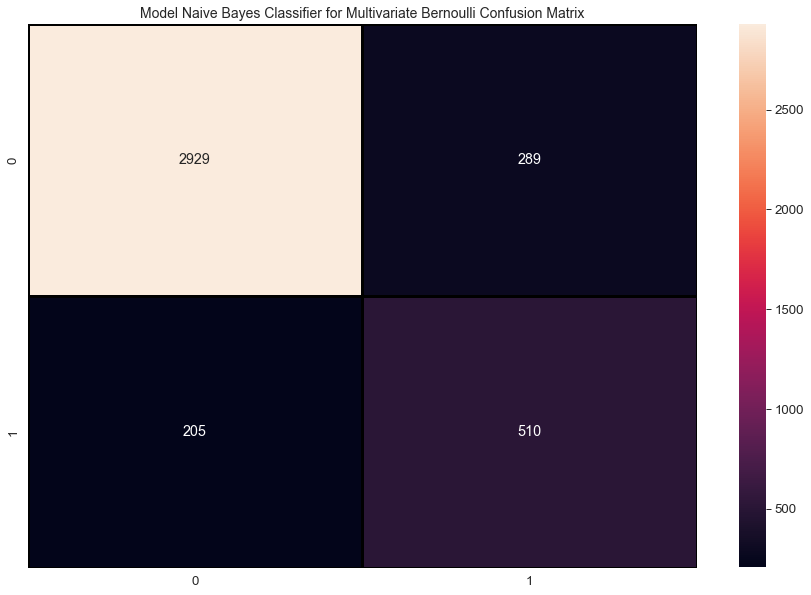

In [104]:
print('Model Naive Bayes Classifier for Multivariate Bernoulli Validation Classification Report:\n ', classification_report(y_test, bnb_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, bnb_m_1_pred_vaild_cpu),
            annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("Model Naive Bayes Classifier for Multivariate Bernoulli Confusion Matrix",fontsize=14)
plt.show()

#### Decision Tree Classifier

Model Decision Tree Classifier Validation Classification Report:
                precision    recall  f1-score   support

           0      0.880     0.889     0.884      3218
           1      0.476     0.455     0.465       715

    accuracy                          0.810      3933
   macro avg      0.678     0.672     0.675      3933
weighted avg      0.807     0.810     0.808      3933



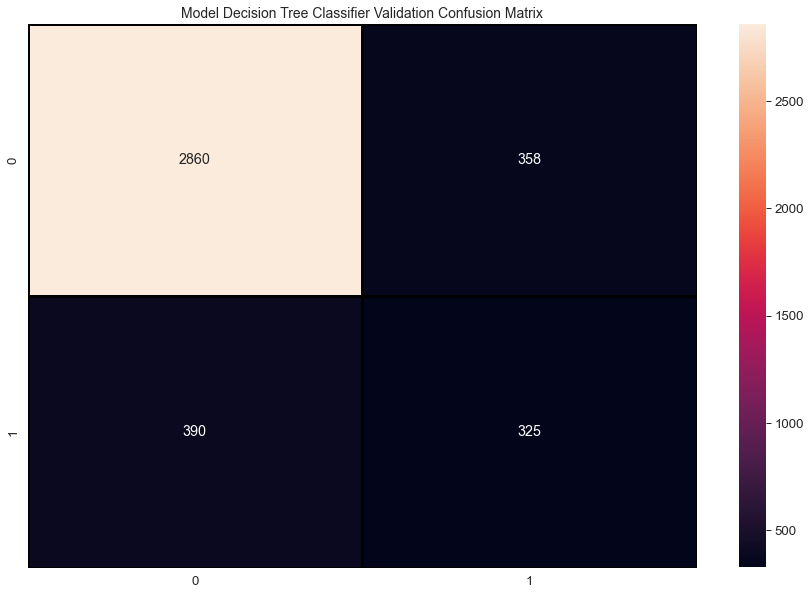

In [105]:
print('Model Decision Tree Classifier Validation Classification Report:\n ', classification_report(y_test, dt_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, dt_m_1_pred_vaild_cpu),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Model Decision Tree Classifier Validation Confusion Matrix",fontsize=14)
plt.show()

#### Logistic Regression Classifier

Model Logistic Regression Classifier Validation Classification Report:
                precision    recall  f1-score   support

           0      0.913     0.953     0.932      3218
           1      0.736     0.589     0.654       715

    accuracy                          0.887      3933
   macro avg      0.824     0.771     0.793      3933
weighted avg      0.880     0.887     0.882      3933



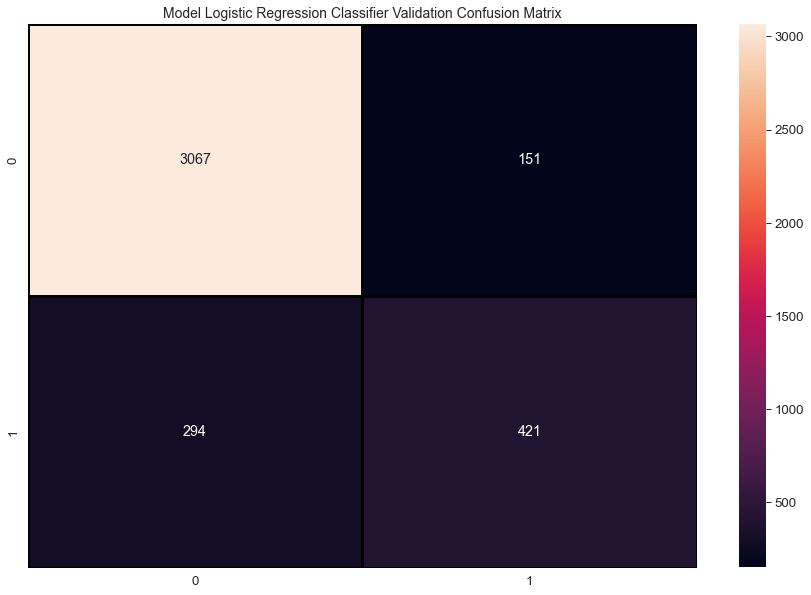

In [106]:
print('Model Logistic Regression Classifier Validation Classification Report:\n ', classification_report(y_test, lg_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, lg_m_1_pred_vaild_cpu),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Model Logistic Regression Classifier Validation Confusion Matrix",fontsize=14)
plt.show()

#### Logistic Regression CV Classifier

Model Logistic Regression CV Classifier Validation Classification Report:
                precision    recall  f1-score   support

           0      0.909     0.956     0.932      3218
           1      0.743     0.571     0.646       715

    accuracy                          0.886      3933
   macro avg      0.826     0.763     0.789      3933
weighted avg      0.879     0.886     0.880      3933



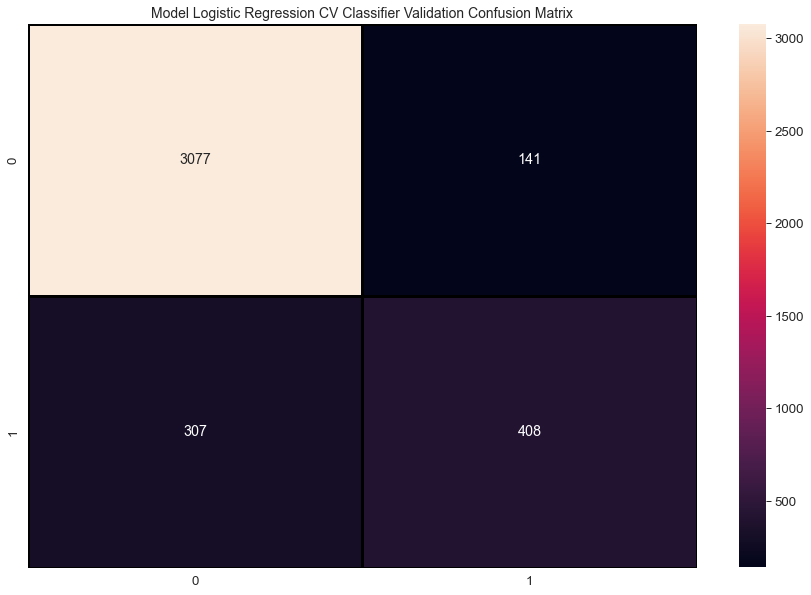

In [107]:
print('Model Logistic Regression CV Classifier Validation Classification Report:\n ', classification_report(y_test, lgcv_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, lgcv_m_1_pred_vaild_cpu),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Model Logistic Regression CV Classifier Validation Confusion Matrix",fontsize=14)
plt.show()

#### Stochastic Gradient Descent Classifier

Model Stochastic Gradient Descent Classifier Validation Classification Report:
                precision    recall  f1-score   support

           0      0.913     0.943     0.928      3218
           1      0.699     0.597     0.644       715

    accuracy                          0.880      3933
   macro avg      0.806     0.770     0.786      3933
weighted avg      0.874     0.880     0.876      3933



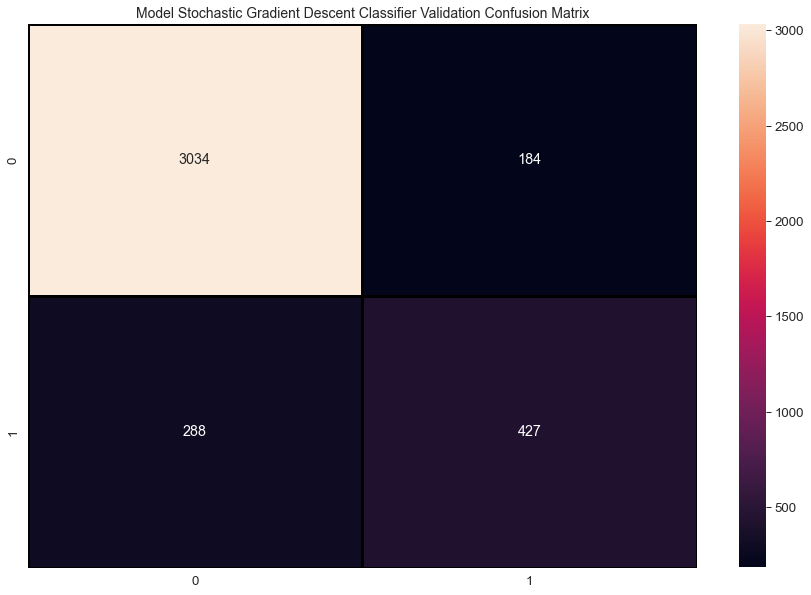

In [108]:
print('Model Stochastic Gradient Descent Classifier Validation Classification Report:\n ', classification_report(y_test, sgdc_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, sgdc_m_1_pred_vaild_cpu),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Model Stochastic Gradient Descent Classifier Validation Confusion Matrix",fontsize=14)
plt.show()

#### Linear Perceptron Classifier

Model Linear Perceptron Classifier Validation Classification Report:
                precision    recall  f1-score   support

           0      0.911     0.912     0.912      3218
           1      0.602     0.601     0.602       715

    accuracy                          0.855      3933
   macro avg      0.757     0.757     0.757      3933
weighted avg      0.855     0.855     0.855      3933



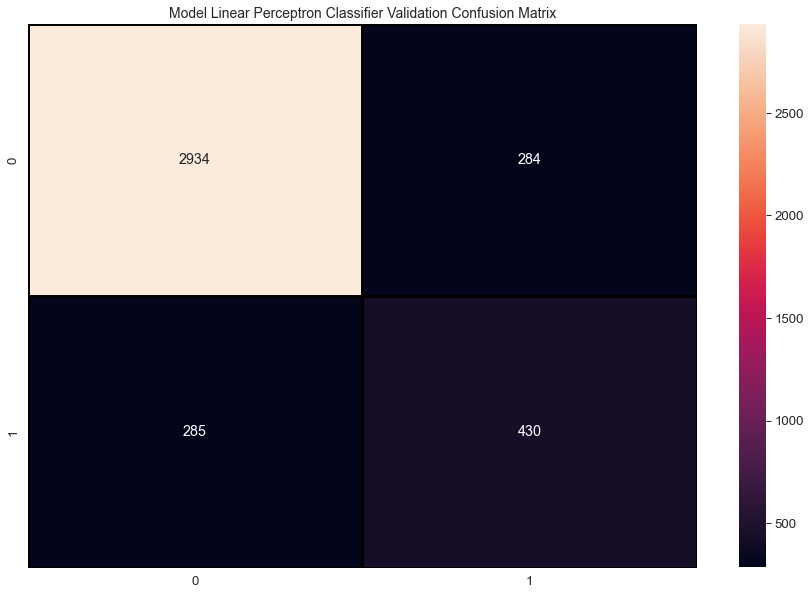

In [109]:
print('Model Linear Perceptron Classifier Validation Classification Report:\n ', classification_report(y_test, lpc_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, lpc_m_1_pred_vaild_cpu),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Model Linear Perceptron Classifier Validation Confusion Matrix",fontsize=14)
plt.show()

#### XGBoost Classifier

Model XGBoost Classifier Validation Classification Report:
                precision    recall  f1-score   support

           0      0.896     0.963     0.928      3218
           1      0.749     0.498     0.598       715

    accuracy                          0.878      3933
   macro avg      0.823     0.730     0.763      3933
weighted avg      0.870     0.878     0.868      3933



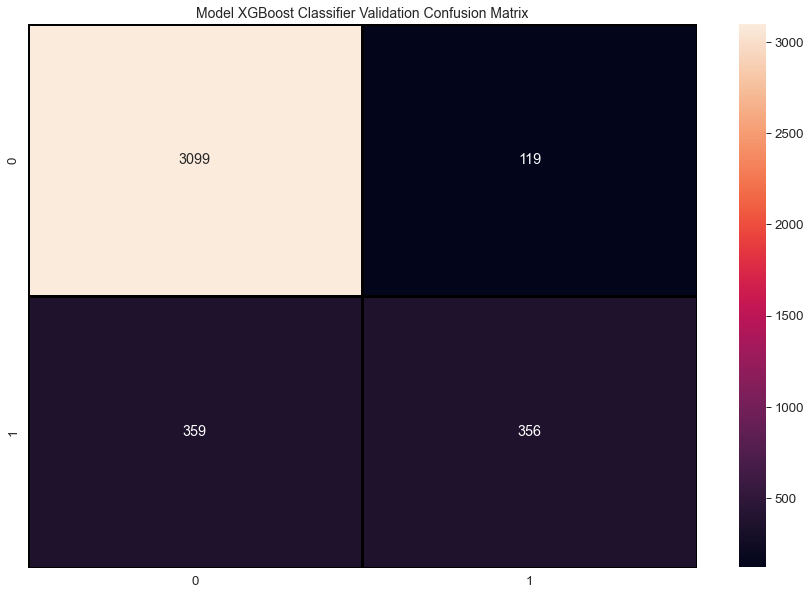

In [110]:
print('Model XGBoost Classifier Validation Classification Report:\n ', classification_report(y_test, xgb_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, xgb_m_1_pred_vaild_cpu),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Model XGBoost Classifier Validation Confusion Matrix",fontsize=14)
plt.show()

#### Support Vector Machines Classifier

Model Support Vector Machines Classifier Validation Classification Report:
                precision    recall  f1-score   support

           0      0.895     0.969     0.930      3218
           1      0.776     0.488     0.599       715

    accuracy                          0.881      3933
   macro avg      0.835     0.728     0.765      3933
weighted avg      0.873     0.881     0.870      3933



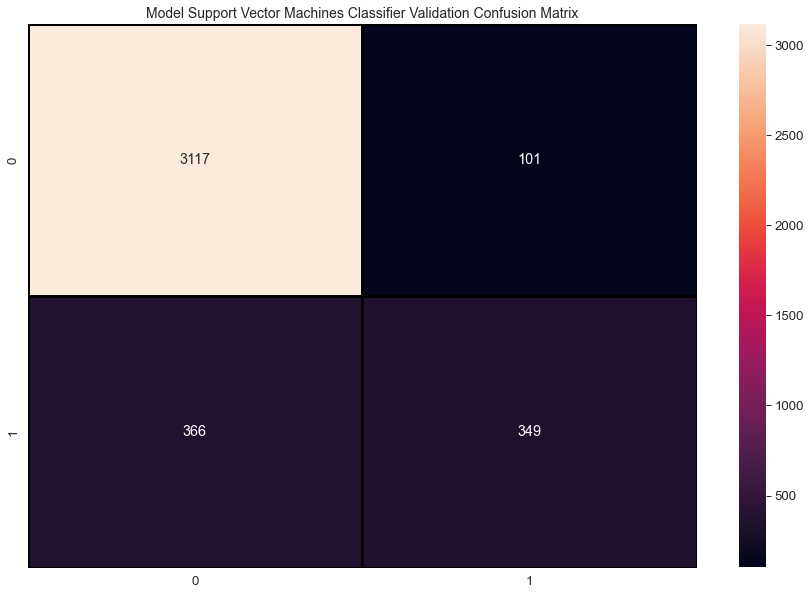

In [111]:
print('Model Support Vector Machines Classifier Validation Classification Report:\n ', classification_report(y_test, svm_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, svm_m_1_pred_vaild_cpu),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Model Support Vector Machines Classifier Validation Confusion Matrix",fontsize=14)
plt.show()

#### Linear Support Vector Classification

Model Linear Support Vector Classificationr Validation Classification Report:
                precision    recall  f1-score   support

           0      0.913     0.925     0.919      3218
           1      0.641     0.606     0.623       715

    accuracy                          0.867      3933
   macro avg      0.777     0.765     0.771      3933
weighted avg      0.864     0.867     0.865      3933



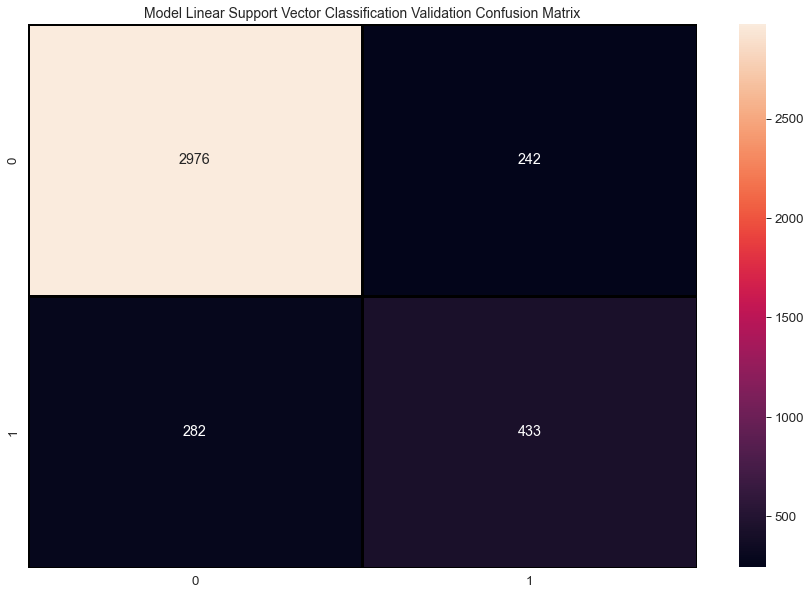

In [112]:
print('Model Linear Support Vector Classificationr Validation Classification Report:\n ', classification_report(y_test, lsvm_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, lsvm_m_1_pred_vaild_cpu),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Model Linear Support Vector Classification Validation Confusion Matrix",fontsize=14)
plt.show()

#### Multilayer Perceptron Classifier

Model Multilayer Perceptron Classifier Validation Classification Report:
                precision    recall  f1-score   support

           0      0.913     0.931     0.922      3218
           1      0.660     0.603     0.630       715

    accuracy                          0.871      3933
   macro avg      0.787     0.767     0.776      3933
weighted avg      0.867     0.871     0.869      3933



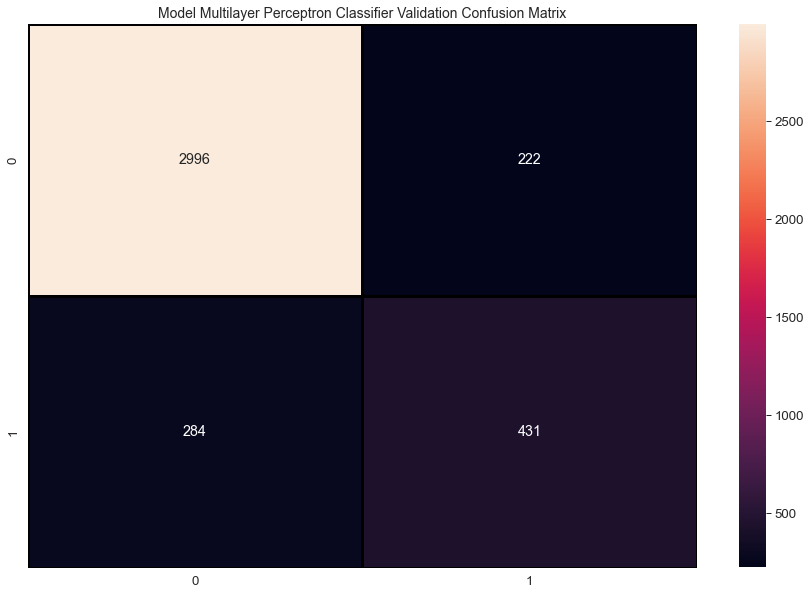

In [113]:
print('Model Multilayer Perceptron Classifier Validation Classification Report:\n ', classification_report(y_test, mlp_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, mlp_m_1_pred_vaild_cpu),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Model Multilayer Perceptron Classifier Validation Confusion Matrix",fontsize=14)
plt.show()

## Build the Models using CPU 'TFIDF'

In [114]:
# Random Forest Classifier
rf_m_1_cpu = RandomForestClassifier().fit(X_train_tf_idf, y_train)
print ('Random Forest Classifier Built')

Random Forest Classifier Built


In [115]:
# Gradient Boosting Classifier
gb_m_1_cpu = GradientBoostingClassifier().fit(X_train_tf_idf, y_train)
print ('Gradient Boosting Classifier Built')

Gradient Boosting Classifier Built


In [117]:
# AdaBoost Classifier
ad_m_1_cpu = AdaBoostClassifier().fit(X_train_tf_idf, y_train)
print ('AdaBoost Classifier Built')

AdaBoost Classifier Built


In [118]:
# Extra Trees Classifier
et_m_1_cpu = ExtraTreesClassifier().fit(X_train_tf_idf, y_train)
print ('Extra Trees Classifier Built')

Extra Trees Classifier Built


In [119]:
# K Neighbors Classifier
knn_m_1_cpu = KNeighborsClassifier().fit(X_train_tf_idf, y_train)
print ('K Neighbors Classifier Classifiers Built')

K Neighbors Classifier Classifiers Built


In [121]:
# Naive Bayes Classifier for Multivariate Bernoulli
bnb_m_1_cpu = BernoulliNB().fit(X_train_tf_idf, y_train)
print ('Naive Bayes Classifier for Multivariate Bernoulli Built')

Naive Bayes Classifier for Multivariate Bernoulli Built


In [122]:
# Decision Tree Classifier
dt_m_1_cpu = DecisionTreeClassifier().fit(X_train_tf_idf, y_train)
print ('Decision Tree Classifier Built')

Decision Tree Classifier Built


In [123]:
# Logistic Regression Classifier
lg_m_1_cpu = LogisticRegression().fit(X_train_tf_idf, y_train)
print ('Logistic Regression Classifier Built')

Logistic Regression Classifier Built


In [124]:
# Logistic Regression CV Classifier
lgcv_m_1_cpu = LogisticRegressionCV().fit(X_train_tf_idf, y_train)
print ('Logistic Regression CV Classifier Built')


Logistic Regression CV Classifier Built


In [125]:
# Stochastic Gradient Descent Classifier
sgdc_m_1_cpu = SGDClassifier().fit(X_train_tf_idf, y_train)
print ('Stochastic Gradient Descent Classifier Built')

Stochastic Gradient Descent Classifier Built


In [126]:
# Linear Perceptron Classifier
lpc_m_1_cpu = Perceptron().fit(X_train_tf_idf, y_train)
print ('Linear Perceptron Classifier Built')

Linear Perceptron Classifier Built


In [127]:
# XGBoost Classifiers
xgb_m_1_cpu = XGBClassifier().fit(X_train_tf_idf, y_train)
print ('XGBoost Classifier Built')


XGBoost Classifier Built


In [128]:
# Support Vector Machines Classifiers
svm_m_1_cpu = SVC().fit(X_train_tf_idf, y_train)
print ('Support Vector Machines Classifiers Built')

Support Vector Machines Classifiers Built


In [129]:
# Linear Support Vector Classification
lsvm_m_1_cpu = LinearSVC().fit(X_train_tf_idf, y_train)
print ('Linear Support Vector Classification Built')

Linear Support Vector Classification Built


## Predict y_test Using CPU 'TFIDF'

In [131]:
# Random Forest Classifier
rf_m_1_pred_vaild_cpu = rf_m_1_cpu.predict(X_test_tf_idf)

# Gradient Boosting Classifier
gb_m_1_pred_vaild_cpu = gb_m_1_cpu.predict(X_test_tf_idf)

# AdaBoost Classifier
ad_m_1_pred_vaild_cpu = ad_m_1_cpu.predict(X_test_tf_idf)

# Extra Trees Classifier
et_m_1_pred_vaild_cpu = et_m_1_cpu.predict(X_test_tf_idf)

# K Neighbors Classifier
knn_m_1_pred_vaild_cpu = knn_m_1_cpu.predict(X_test_tf_idf)

# Naive Bayes Classifier for Multivariate Bernoulli
bnb_m_1_pred_vaild_cpu = bnb_m_1_cpu.predict(X_test_tf_idf)

# Decision Tree Classifier
dt_m_1_pred_vaild_cpu = dt_m_1_cpu.predict(X_test_tf_idf)

# Logistic Regression Classifier
lg_m_1_pred_vaild_cpu = lg_m_1_cpu.predict(X_test_tf_idf)

# Logistic Regression CV Classifier
lgcv_m_1_pred_vaild_cpu =  lgcv_m_1_cpu.predict(X_test_tf_idf)

# Stochastic Gradient Descent Classifier
sgdc_m_1_pred_vaild_cpu =  sgdc_m_1_cpu.predict(X_test_tf_idf)

# Linear Perceptron Classifier
lpc_m_1_pred_vaild_cpu =  lpc_m_1_cpu.predict(X_test_tf_idf)

# XGBoost Classifiers
xgb_m_1_pred_vaild_cpu = xgb_m_1_cpu.predict(X_test_tf_idf)

# Support Vector Machines Classifiers
svm_m_1_pred_vaild_cpu = svm_m_1_cpu.predict(X_test_tf_idf)

# Linear Support Vector Classification
lsvm_m_1_pred_vaild_cpu = lsvm_m_1_cpu.predict(X_test_tf_idf)

## Evaluate the Models CPU 'TFIDF'

### Accuracy Score

In [132]:
# Random Forest Classifier
Valid_accuracy_rf_m_1_cpu = accuracy_score(y_test, rf_m_1_pred_vaild_cpu)

# Gradient Boosting Classifier
Valid_accuracy_gb_m_1_cpu = accuracy_score(y_test, gb_m_1_pred_vaild_cpu)

# AdaBoost Classifier
Valid_accuracy_ad_m_1_cpu = accuracy_score(y_test, ad_m_1_pred_vaild_cpu)

# Extra Trees Classifier
Valid_accuracy_et_m_1_cpu = accuracy_score(y_test, et_m_1_pred_vaild_cpu)

# K Neighbors Classifier
Valid_accuracy_knn_m_1_cpu = accuracy_score(y_test, knn_m_1_pred_vaild_cpu)

# Naive Bayes Classifier for Multivariate Bernoulli
Valid_accuracy_bnb_m_1_cpu = accuracy_score(y_test, bnb_m_1_pred_vaild_cpu)

# Decision Tree Classifier
Valid_accuracy_dt_m_1_cpu = accuracy_score(y_test, dt_m_1_pred_vaild_cpu)

# Logistic Regression Classifier
Valid_accuracy_lg_m_1_cpu = accuracy_score(y_test, lg_m_1_pred_vaild_cpu)

# Logistic Regression CV Classifier
Valid_accuracy_lgcv_m_1_cpu = accuracy_score(y_test, lgcv_m_1_pred_vaild_cpu)

# Stochastic Gradient Descent Classifier
Valid_accuracy_sgdc_m_1_cpu = accuracy_score(y_test, sgdc_m_1_pred_vaild_cpu)

# Linear Perceptron Classifier
Valid_accuracy_lpc_m_1_cpu = accuracy_score(y_test, lpc_m_1_pred_vaild_cpu)

# XGBoost Classifiers
Valid_accuracy_xgb_m_1_cpu = accuracy_score(y_test, xgb_m_1_pred_vaild_cpu)

# Support Vector Machines Classifiers
Valid_accuracy_svm_m_1_cpu = accuracy_score(y_test, svm_m_1_pred_vaild_cpu)

# Linear Support Vector Classification
Valid_accuracy_lsvm_m_1_cpu = accuracy_score(y_test, lsvm_m_1_pred_vaild_cpu)

cpu_ml_TFIDF_valid_compare = pd.DataFrame({"TFIDF CPU Models": [
                                "Random Forest Classifier", 
                                "Gradient Boosting Classifier",
                                "AdaBoost Classifier",
                                "Extra Trees Classifier",
                                "K Neighbors Classifier",
                                "Naive Bayes Classifier for Multivariate Bernoulli",
                                "Decision Tree Classifier",
                                "Logistic Regression Classifier",
                                "Logistic Regression CV Classifier",
                                "Stochastic Gradient Descent Classifier",
                                "Linear Perceptron Classifier",
                                "XGBoost Classifiers",
                                "Support Vector Machines Classifiers",
                                "Linear Support Vector Classification",
                                ],

                "TFIDF CPU Models Accuracy": [
                                Valid_accuracy_rf_m_1_cpu, 
                                Valid_accuracy_gb_m_1_cpu,
                                Valid_accuracy_ad_m_1_cpu,
                                Valid_accuracy_et_m_1_cpu,
                                Valid_accuracy_knn_m_1_cpu,
                                Valid_accuracy_bnb_m_1_cpu,
                                Valid_accuracy_dt_m_1_cpu,
                                Valid_accuracy_lg_m_1_cpu,
                                Valid_accuracy_lgcv_m_1_cpu,
                                Valid_accuracy_sgdc_m_1_cpu,
                                Valid_accuracy_lpc_m_1_cpu,
                                Valid_accuracy_xgb_m_1_cpu,
                                Valid_accuracy_svm_m_1_cpu,
                                Valid_accuracy_lsvm_m_1_cpu,
                                ],
                        })  
                                
print(tabulate(cpu_ml_TFIDF_valid_compare.sort_values(by="TFIDF CPU Models Accuracy", ascending=False), headers = 'keys', tablefmt = 'psql'))
fig = px.bar(cpu_ml_TFIDF_valid_compare.sort_values(by="TFIDF CPU Models Accuracy", ascending=True), x = "TFIDF CPU Models Accuracy", y = "TFIDF CPU Models", title = "CPU TFIDF Machines Learning Validation Accuracy")
fig.show()

+----+---------------------------------------------------+-----------------------------+
|    | TFIDF CPU Models                                  |   TFIDF CPU Models Accuracy |
|----+---------------------------------------------------+-----------------------------|
|  8 | Logistic Regression CV Classifier                 |                    0.887363 |
| 13 | Linear Support Vector Classification              |                    0.886601 |
| 12 | Support Vector Machines Classifiers               |                    0.885584 |
|  9 | Stochastic Gradient Descent Classifier            |                    0.885075 |
|  7 | Logistic Regression Classifier                    |                    0.883295 |
| 11 | XGBoost Classifiers                               |                    0.878464 |
|  5 | Naive Bayes Classifier for Multivariate Bernoulli |                    0.874396 |
|  2 | AdaBoost Classifier                               |                    0.8627   |
|  1 | Gradient Boost

### Classification Report and Confusion Matrix

#### Random Forest Classifier

Model Random Forest Classifier Validation Classification Report:
                precision    recall  f1-score   support

           0      0.846     0.993     0.914      3218
           1      0.860     0.189     0.310       715

    accuracy                          0.847      3933
   macro avg      0.853     0.591     0.612      3933
weighted avg      0.849     0.847     0.804      3933



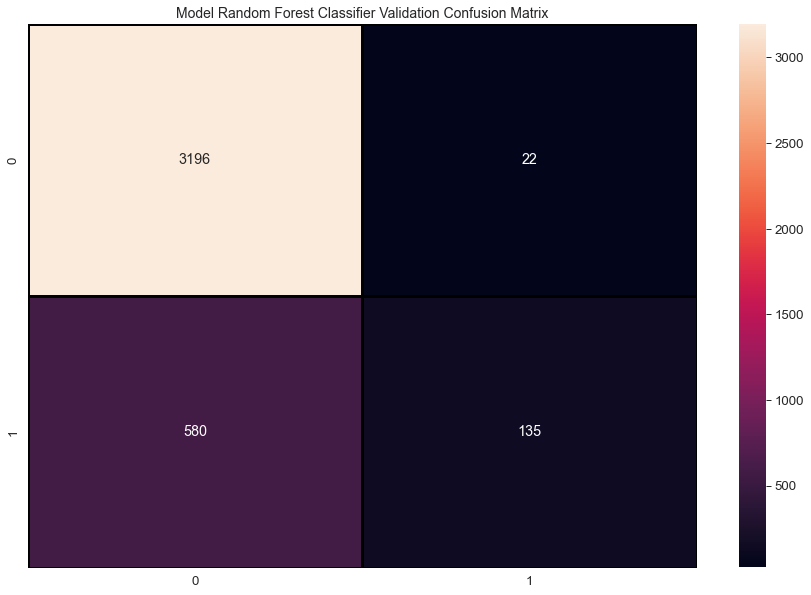

In [133]:
print('Model Random Forest Classifier Validation Classification Report:\n ', classification_report(y_test, rf_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, rf_m_1_pred_vaild_cpu),
            annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("Model Random Forest Classifier Validation Confusion Matrix",fontsize=14)
plt.show()

#### Gradient Boosting Classifier

Model Gradient Boosting Classifier Validation Classification Report:
                precision    recall  f1-score   support

           0      0.863     0.982     0.918      3218
           1      0.783     0.298     0.432       715

    accuracy                          0.857      3933
   macro avg      0.823     0.640     0.675      3933
weighted avg      0.848     0.857     0.830      3933



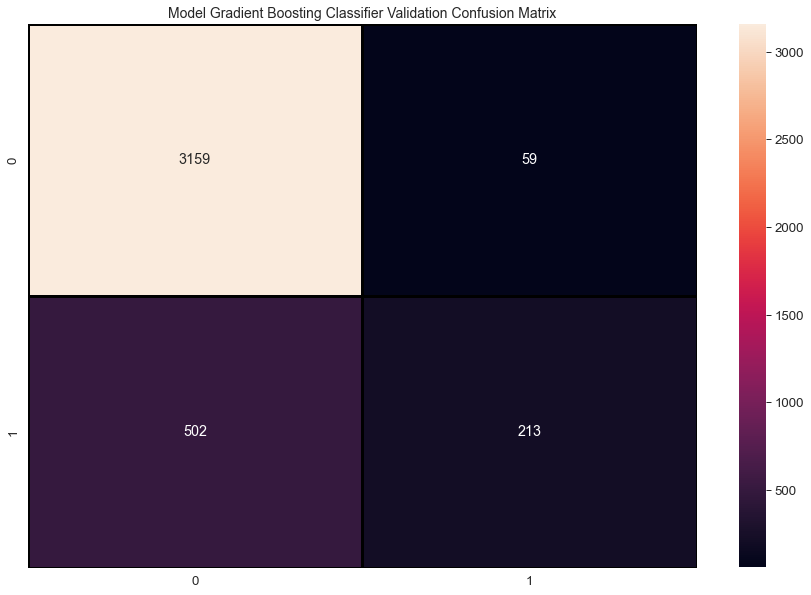

In [134]:
print('Model Gradient Boosting Classifier Validation Classification Report:\n ', classification_report(y_test, gb_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, gb_m_1_pred_vaild_cpu),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Model Gradient Boosting Classifier Validation Confusion Matrix",fontsize=14)
plt.show()

#### AdaBoost Classifier

Model AdaBoost Classifier Validation Classification Report:
                precision    recall  f1-score   support

           0      0.885     0.956     0.919      3218
           1      0.691     0.443     0.540       715

    accuracy                          0.863      3933
   macro avg      0.788     0.700     0.730      3933
weighted avg      0.850     0.863     0.850      3933



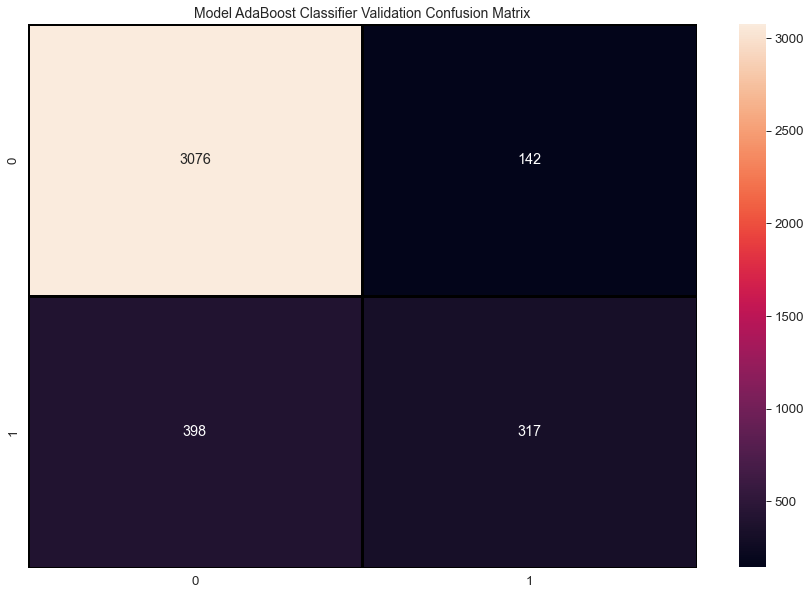

In [135]:
print('Model AdaBoost Classifier Validation Classification Report:\n ', classification_report(y_test, ad_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, ad_m_1_pred_vaild_cpu),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Model AdaBoost Classifier Validation Confusion Matrix",fontsize=14)
plt.show()

#### Extra Trees Classifier

Model Extra Trees Classifier Validation Classification Report:
                precision    recall  f1-score   support

           0      0.846     0.994     0.914      3218
           1      0.880     0.185     0.305       715

    accuracy                          0.847      3933
   macro avg      0.863     0.590     0.610      3933
weighted avg      0.852     0.847     0.803      3933



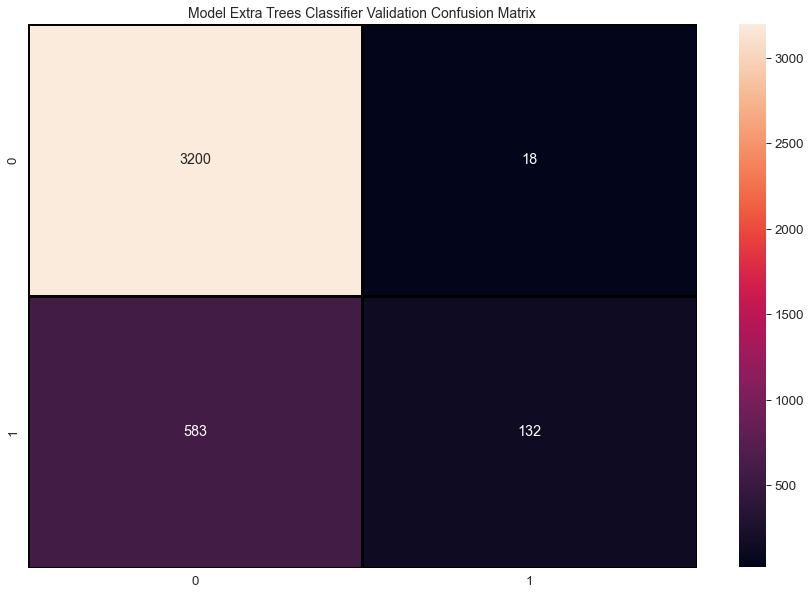

In [136]:
print('Model Extra Trees Classifier Validation Classification Report:\n ', classification_report(y_test, et_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, et_m_1_pred_vaild_cpu),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Model Extra Trees Classifier Validation Confusion Matrix",fontsize=14)
plt.show()

#### K Neighbors Classifier

Model K Neighbors Classifier Validation Classification Report:
                precision    recall  f1-score   support

           0      0.862     0.967     0.912      3218
           1      0.671     0.305     0.419       715

    accuracy                          0.846      3933
   macro avg      0.767     0.636     0.665      3933
weighted avg      0.827     0.846     0.822      3933



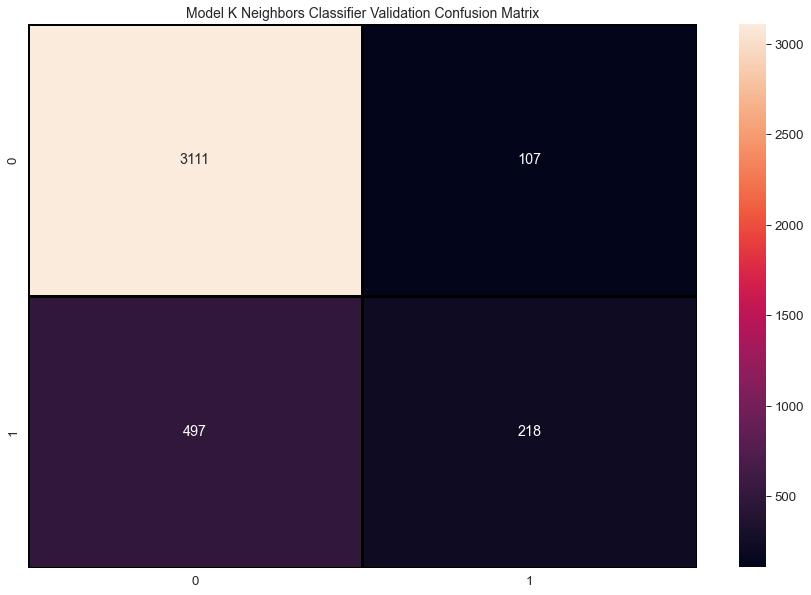

In [137]:
print('Model K Neighbors Classifier Validation Classification Report:\n ', classification_report(y_test, knn_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, knn_m_1_pred_vaild_cpu),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Model K Neighbors Classifier Validation Confusion Matrix",fontsize=14)
plt.show()

#### Naive Bayes Classifier for Multivariate Bernoulli

Model Naive Bayes Classifier for Multivariate Bernoulli Validation Classification Report:
                precision    recall  f1-score   support

           0      0.935     0.910     0.922      3218
           1      0.638     0.713     0.674       715

    accuracy                          0.874      3933
   macro avg      0.786     0.812     0.798      3933
weighted avg      0.881     0.874     0.877      3933



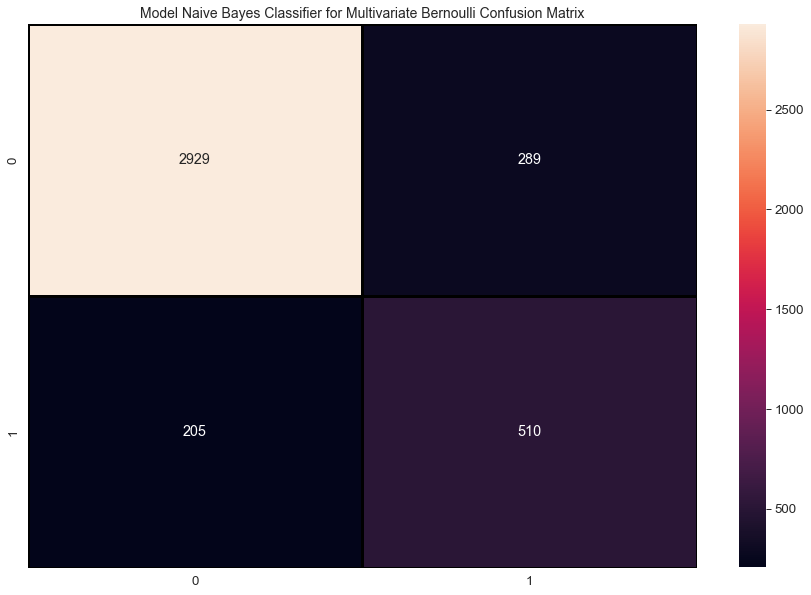

In [138]:
print('Model Naive Bayes Classifier for Multivariate Bernoulli Validation Classification Report:\n ', classification_report(y_test, bnb_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, bnb_m_1_pred_vaild_cpu),
            annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("Model Naive Bayes Classifier for Multivariate Bernoulli Confusion Matrix",fontsize=14)
plt.show()

#### Decision Tree Classifier

Model Decision Tree Classifier Validation Classification Report:
                precision    recall  f1-score   support

           0      0.874     0.888     0.881      3218
           1      0.456     0.424     0.439       715

    accuracy                          0.803      3933
   macro avg      0.665     0.656     0.660      3933
weighted avg      0.798     0.803     0.800      3933



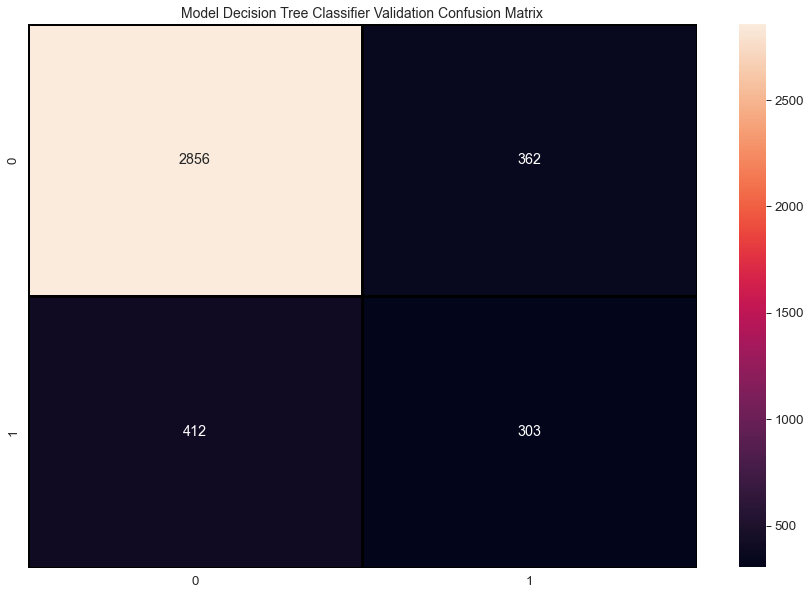

In [139]:
print('Model Decision Tree Classifier Validation Classification Report:\n ', classification_report(y_test, dt_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, dt_m_1_pred_vaild_cpu),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Model Decision Tree Classifier Validation Confusion Matrix",fontsize=14)
plt.show()

#### Logistic Regression Classifier

Model Logistic Regression Classifier Validation Classification Report:
                precision    recall  f1-score   support

           0      0.897     0.969     0.931      3218
           1      0.781     0.498     0.608       715

    accuracy                          0.883      3933
   macro avg      0.839     0.733     0.770      3933
weighted avg      0.876     0.883     0.873      3933



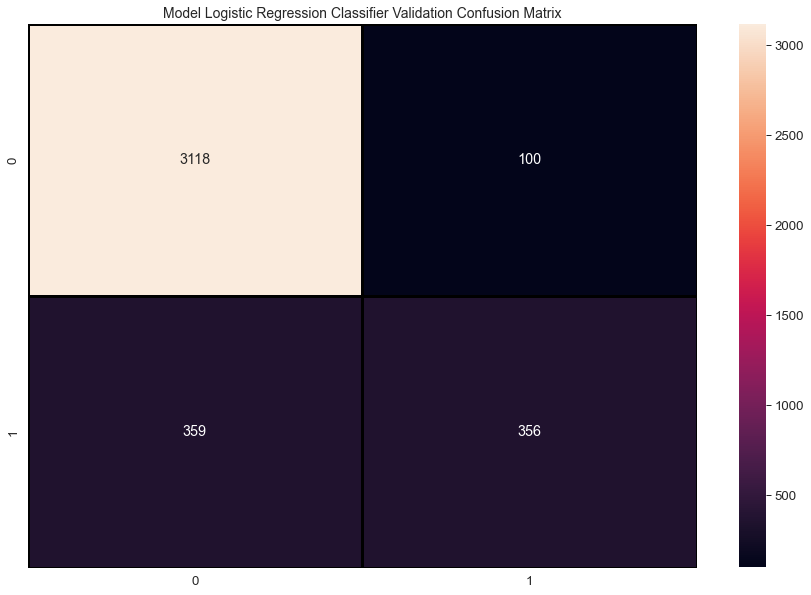

In [140]:
print('Model Logistic Regression Classifier Validation Classification Report:\n ', classification_report(y_test, lg_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, lg_m_1_pred_vaild_cpu),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Model Logistic Regression Classifier Validation Confusion Matrix",fontsize=14)
plt.show()

#### Logistic Regression CV Classifier

Model Logistic Regression CV Classifier Validation Classification Report:
                precision    recall  f1-score   support

           0      0.907     0.960     0.933      3218
           1      0.758     0.559     0.644       715

    accuracy                          0.887      3933
   macro avg      0.833     0.760     0.788      3933
weighted avg      0.880     0.887     0.880      3933



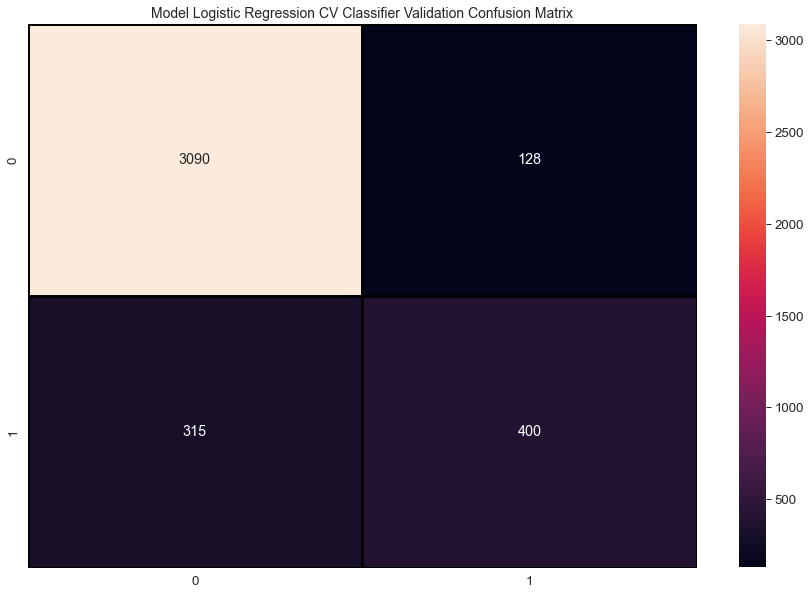

In [141]:
print('Model Logistic Regression CV Classifier Validation Classification Report:\n ', classification_report(y_test, lgcv_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, lgcv_m_1_pred_vaild_cpu),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Model Logistic Regression CV Classifier Validation Confusion Matrix",fontsize=14)
plt.show()

#### Stochastic Gradient Descent Classifier

Model Stochastic Gradient Descent Classifier Validation Classification Report:
                precision    recall  f1-score   support

           0      0.905     0.960     0.932      3218
           1      0.753     0.547     0.634       715

    accuracy                          0.885      3933
   macro avg      0.829     0.754     0.783      3933
weighted avg      0.878     0.885     0.878      3933



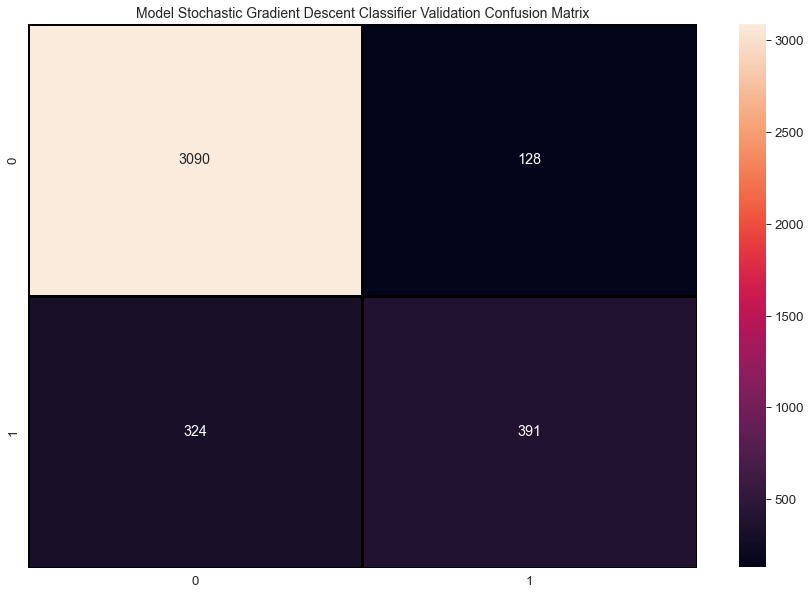

In [142]:
print('Model Stochastic Gradient Descent Classifier Validation Classification Report:\n ', classification_report(y_test, sgdc_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, sgdc_m_1_pred_vaild_cpu),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Model Stochastic Gradient Descent Classifier Validation Confusion Matrix",fontsize=14)
plt.show()

#### Linear Perceptron Classifier

Model Linear Perceptron Classifier Validation Classification Report:
                precision    recall  f1-score   support

           0      0.916     0.904     0.910      3218
           1      0.592     0.627     0.609       715

    accuracy                          0.854      3933
   macro avg      0.754     0.765     0.759      3933
weighted avg      0.857     0.854     0.855      3933



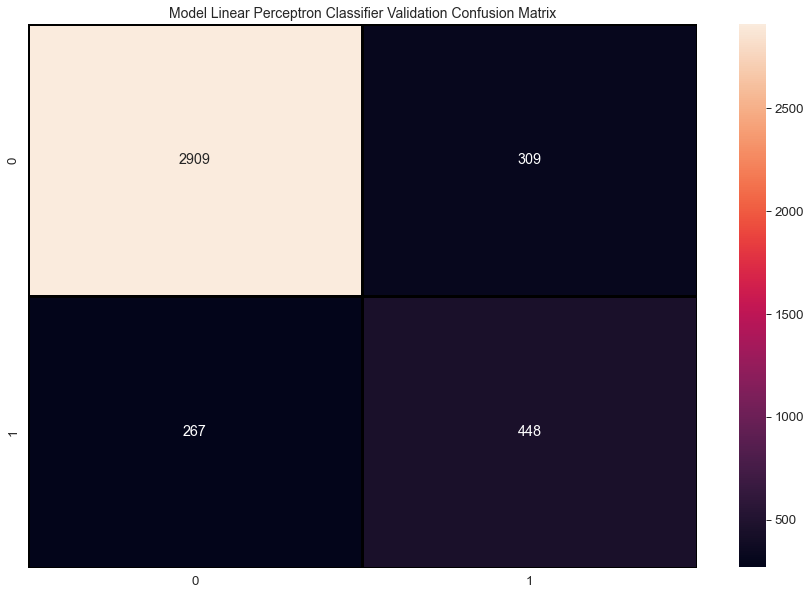

In [143]:
print('Model Linear Perceptron Classifier Validation Classification Report:\n ', classification_report(y_test, lpc_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, lpc_m_1_pred_vaild_cpu),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Model Linear Perceptron Classifier Validation Confusion Matrix",fontsize=14)
plt.show()

#### XGBoost Classifier

Model XGBoost Classifier Validation Classification Report:
                precision    recall  f1-score   support

           0      0.893     0.968     0.929      3218
           1      0.767     0.476     0.587       715

    accuracy                          0.878      3933
   macro avg      0.830     0.722     0.758      3933
weighted avg      0.870     0.878     0.867      3933



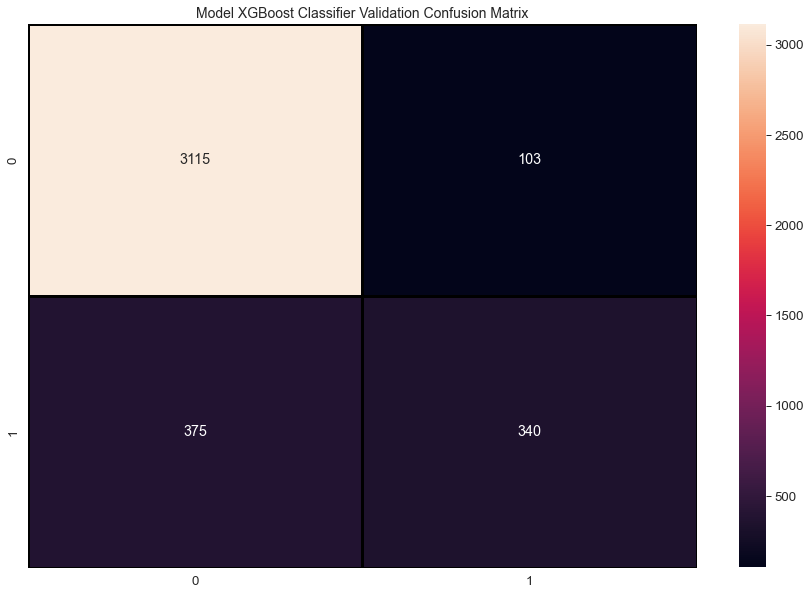

In [144]:
print('Model XGBoost Classifier Validation Classification Report:\n ', classification_report(y_test, xgb_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, xgb_m_1_pred_vaild_cpu),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Model XGBoost Classifier Validation Confusion Matrix",fontsize=14)
plt.show()

#### Support Vector Machines Classifier

Model Support Vector Machines Classifier Validation Classification Report:
                precision    recall  f1-score   support

           0      0.900     0.968     0.933      3218
           1      0.781     0.515     0.621       715

    accuracy                          0.886      3933
   macro avg      0.841     0.741     0.777      3933
weighted avg      0.878     0.886     0.876      3933



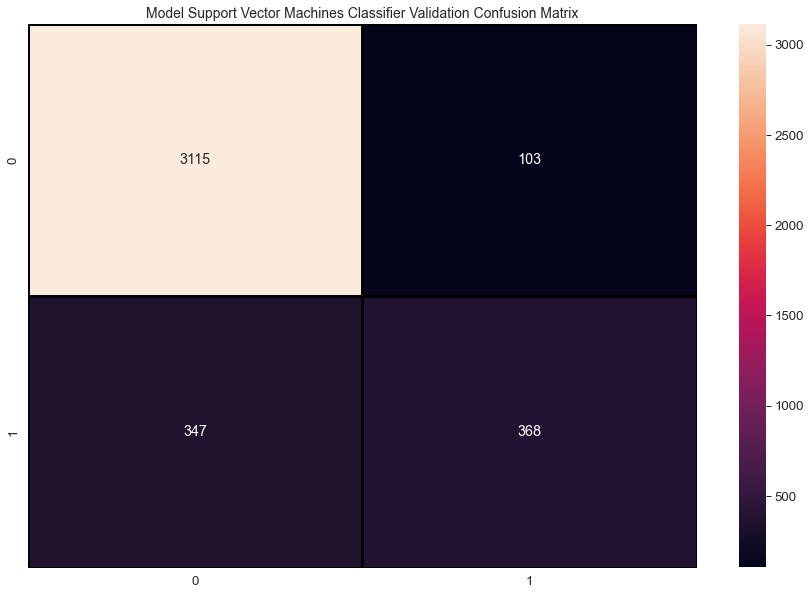

In [145]:
print('Model Support Vector Machines Classifier Validation Classification Report:\n ', classification_report(y_test, svm_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, svm_m_1_pred_vaild_cpu),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Model Support Vector Machines Classifier Validation Confusion Matrix",fontsize=14)
plt.show()

#### Linear Support Vector Classification

Model Linear Support Vector Classificationr Validation Classification Report:
                precision    recall  f1-score   support

           0      0.914     0.950     0.932      3218
           1      0.728     0.600     0.658       715

    accuracy                          0.887      3933
   macro avg      0.821     0.775     0.795      3933
weighted avg      0.881     0.887     0.882      3933



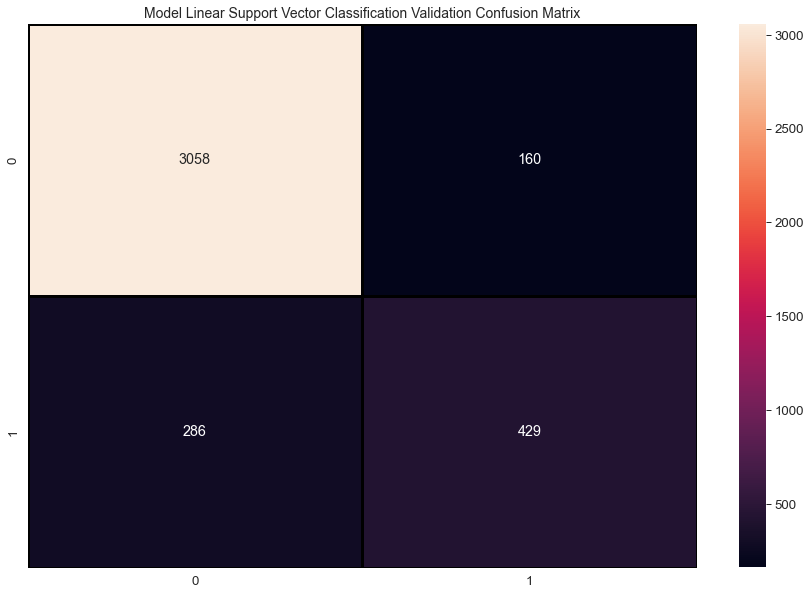

In [146]:
print('Model Linear Support Vector Classificationr Validation Classification Report:\n ', classification_report(y_test, lsvm_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, lsvm_m_1_pred_vaild_cpu),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Model Linear Support Vector Classification Validation Confusion Matrix",fontsize=14)
plt.show()

# Accuracy Score Summary  

In [147]:
cpu_ml_m_1_valid_compare = pd.DataFrame(cpu_ml_m_1_valid_compare) 
cpu_ml_op_m_1_valid_compare = pd.DataFrame(cpu_ml_TFIDF_valid_compare) 
FTR_ML_Accuracy_result = pd.concat([cpu_ml_m_1_valid_compare.set_index('Voctrization CPU Models'),
                                    cpu_ml_TFIDF_valid_compare.set_index('TFIDF CPU Models')], axis=1)

FTR_ML_Accuracy_result = FTR_ML_Accuracy_result.sort_values(by="Voctrization CPU Models Accuracy", ascending=False)
pd.DataFrame(FTR_ML_Accuracy_result)

,Voctrization CPU Models Accuracy,TFIDF CPU Models Accuracy
Logistic Regression Classifier,0.887,0.883
Logistic Regression CV Classifier,0.886,0.887
Support Vector Machines Classifiers,0.881,0.886
Stochastic Gradient Descent Classifier,0.880,0.885
XGBoost Classifiers,0.878,0.878
Naive Bayes Classifier for Multivariate Bernoulli,0.874,0.874
Multilayer Perceptron Classifier,0.871,NaN
Linear Support Vector Classification,0.867,0.887
AdaBoost Classifier,0.866,0.863
Gradient Boosting Classifier,0.859,0.857
